# **TFG**  

***Use of Machine Learning and SNOMED CT encoded Health Problems to Predict Hospital Discharge Diagnoses***  

Cindy Chen

Universitat de Barcelona

2024-2025


In [ ]:
# Import modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%matplotlib inline

## **Data importation**

In [ ]:
# Load administration file
administration_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/02_data/administration_df.csv')
administration_df

,nhc,episode_ref,treatment_ref,adm_event_date,adm_route_ref,adm_route_descr,adm_prn,adm_given,no_administration_reason_ref,adm_drug_ref,adm_drug_descr,adm_atc_ref,adm_atc_descr,adm_enum,adm_drug_dose,adm_drug_dose_planing,adm_drug_unit,adm_load_date,care_level_ref
0,101578,558513,1146612,2024-02-06 20:48:00,350,PERFUSION INTRAVENOSA,0,0,0,E56DE74AEBF98B59E1000000AC10014C,"GLUCOSA 10%, VIAL 500 ML",B05BA91,Suero glucosado,0,500.0,500.0,ML,2024-10-26 10:47:29,21866480
1,101578,558513,1146612,2024-02-06 20:48:00,350,PERFUSION INTRAVENOSA,0,0,0,676E5C461C27EF6FE1000000AC100155,"GLUCOSA 10%, VIAL 500 ML",B05BA03,Carbohidratos,3,500.0,500.0,ML,2024-10-26 10:47:29,21866480
2,101578,558513,1146612,2024-02-07 01:00:00,350,PERFUSION INTRAVENOSA,0,0,0,E56DE74AEBF98B59E1000000AC10014C,"GLUCOSA 10%, VIAL 500 ML",B05BA91,Suero glucosado,0,500.0,500.0,ML,2024-10-26 10:47:29,21866480
3,101578,558513,1146612,2024-02-07 01:00:00,350,PERFUSION INTRAVENOSA,0,0,0,676E5C461C27EF6FE1000000AC100155,"GLUCOSA 10%, VIAL 500 ML",B05BA03,Carbohidratos,3,500.0,500.0,ML,2024-10-26 10:47:29,21866480
4,101578,558513,1146612,2024-02-07 08:20:58,350,PERFUSION INTRAVENOSA,0,1,9,E56DE74AEBF98B59E1000000AC10014C,"GLUCOSA 10%, VIAL 500 ML",B05BA91,Suero glucosado,0,500.0,NaN,ML,2024-10-26 10:47:29,21866480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451520,9885,607221,1189193,2024-02-16 09:00:00,100,ORAL,0,0,0,AB6D5C461C27EF6FE1000000AC100155,"ESPIRONOLACTONA, 100 MG COMP",C03DA01,Espironolactona,0,0.5,0.5,UND,2024-10-26 10:47:29,21967287
451521,9885,607221,1189193,2024-02-17 09:00:00,100,ORAL,0,0,0,AB6D5C461C27EF6FE1000000AC100155,"ESPIRONOLACTONA, 100 MG COMP",C03DA01,Espironolactona,0,0.5,0.5,UND,2024-10-26 10:47:29,21967287
451522,9885,607221,1189193,2024-02-18 09:00:00,100,ORAL,0,0,0,AB6D5C461C27EF6FE1000000AC100155,"ESPIRONOLACTONA, 100 MG COMP",C03DA01,Espironolactona,0,0.5,0.5,UND,2024-10-26 10:47:29,21967287
451523,9885,607221,1189193,2024-02-19 09:00:00,100,ORAL,0,0,0,AB6D5C461C27EF6FE1000000AC100155,"ESPIRONOLACTONA, 100 MG COMP",C03DA01,Espironolactona,0,0.5,0.5,UND,2024-10-26 10:47:29,21967287


In [ ]:
# Load admission discharge file
# admission_discharge_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/02_data/admission_discharge_df.csv')
# admission_discharge_df

In [ ]:
# Load care level file
care_level_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/02_data/care_level_df.csv')
care_level_df

,nhc,episode_ref,care_level_ref,care_level_start_date,care_level_end_date,care_level_load_date,care_level_type_ref
0,100032,210865,22649948,2024-04-03 09:26:00,2024-04-03 13:42:48,2024-10-20 12:57:35,PEND. CLAS
1,100032,706875,22051594,2024-02-20 10:33:00,2024-02-20 13:58:40,2024-10-20 12:57:35,PEND. CLAS
2,100032,1501103,20238333,2023-10-03 10:23:00,2023-10-03 14:32:43,2024-10-20 12:57:35,PEND. CLAS
3,100424,3358256,17991800,2022-10-26 14:29:06,2022-10-26 21:18:07,2024-11-04 22:37:20,EM
4,101254,3390092,17624298,2022-09-02 14:38:37,2022-09-02 21:54:31,2024-11-04 22:37:20,PEND. CLAS
...,...,...,...,...,...,...,...
49193,9885,594249,21945545,2024-02-08 16:38:10,2024-02-09 20:56:10,2024-10-20 12:57:35,EM
49194,9885,607221,21967287,2024-02-13 12:15:16,2024-02-28 15:45:00,2024-10-20 12:57:35,WARD
49195,9885,607221,21968690,2024-02-11 23:34:28,2024-02-13 12:15:16,2024-10-20 12:57:35,ICU
49196,9885,607221,21968926,2024-02-09 21:04:15,2024-02-11 23:34:28,2024-10-20 12:57:35,WARD


In [ ]:
# Load clinical records file
clinical_records_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/02_data/clinical_records_df.csv')
clinical_records_df

,nhc,episode_ref,clinical_records_result_date,cr_meas_type_ref,clinical_records_load_date,cr_ou_loc_ref,cr_ou_ned_ref,rc_sap_ref,clinical_records_result_num,clinical_records_result_txt,clinical_records_units,clinical_records_descr,care_level_ref
0,101578,558513,2024-02-06 13:31:00,1,2024-10-20 17:58:05,NaN,NaN,PRESN_DIA,74.0,NaN,mm Hg,Presión arterial no invasiva diastólica,21866480
1,101578,558513,2024-02-06 13:31:00,1,2024-10-20 17:58:05,NaN,NaN,FR_IP,12.0,NaN,resp/min,Frecuencia respiratoria por impedancia,21866480
2,101578,558513,2024-02-06 13:31:00,1,2024-10-20 17:58:05,NaN,NaN,FC_OSC,103.0,NaN,lpm,Frecuencia cardíaca por oscilometría,21866480
3,101578,558513,2024-02-06 13:31:00,1,2024-10-20 17:58:05,NaN,NaN,FREC_RESP,12.0,NaN,resp/min,Frecuencia respiratoria por inspección,21866480
4,101578,558513,2024-02-06 13:31:00,1,2024-10-20 17:58:05,NaN,NaN,TEMP_CT,36.5,NaN,°C,Temperatura cutánea,21866480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035317,9885,594249,2024-02-08 22:00:00,0,2024-10-21 16:19:04,PUR2,URM,CUERPO_CETONICO,NaN,CUERPO_CETONICO_,Descripción,Cuerpos cetónicos en tira reactiva,21945545
3035318,9885,594249,2024-02-08 22:00:00,0,2024-10-21 16:19:04,PUR2,URM,LEUCOCITURIA,NaN,LEUCOCITURIA_4,Descripción,Leucocituria en tira reactiva,21945545
3035319,9885,594249,2024-02-08 22:00:00,0,2024-10-21 16:19:04,PUR2,URM,NITRITO_ORINA,NaN,NITRITO_ORINAQ_1,Descripción,Nitritos en tira reactiva,21945545
3035320,9885,594249,2024-02-08 22:00:00,0,2024-10-21 16:19:04,PUR2,URM,UROBILINO_ORINA,NaN,UROBILINO_ORINA_,Descripción,Urobilinógeno en tira reactiva,21945545


In [ ]:
# Load demographic file
demographic_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/02_data/demographic_df.csv')
demographic_df

,nhc,birth_date,sex_atr,natio_ref,nation_descr,demographic_load_date
0,100032,1955-06-18,2,ES,España,2024-10-20 11:50:51
1,100424,1962-12-05,2,ES,España,2024-10-25 19:03:32
2,101254,1956-06-11,2,ES,España,2024-10-20 11:50:51
3,101347,1988-07-03,2,ES,España,2024-10-20 11:50:51
4,10141,1956-10-20,2,ES,España,2024-10-20 11:50:51
...,...,...,...,...,...,...
20284,98787,1946-07-04,2,ES,España,2024-10-20 11:50:51
20285,9885,1955-12-28,2,ES,España,2024-10-20 11:50:51
20286,99191,1962-12-10,2,ES,España,2024-11-04 22:23:45
20287,99419,1968-06-24,1,ES,España,2024-10-20 11:50:51


In [ ]:
# Load diagnostic file
diagnostic_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/02_data/diagnostic_df.csv')
diagnostic_df

,nhc,episode_ref,reg_date,diag_ref,diag_catalog,icd10_code,icd10_descr,diag_class_ref,diag_poa_ref,diagnostic_load_date
0,100032,210865,2024-03-27 13:45:11,17136,12,C44.92,"Carcinoma de células escamosas de piel, locali...",H,0,2024-10-20 14:35:10
1,100032,210865,2024-04-03 10:00:00,17136,12,C44.92,"Carcinoma de células escamosas de piel, locali...",H,0,2024-10-20 14:35:10
2,100032,210865,2024-04-03 09:26:00,23995,12,L82.1,Otros tipos de queratosis seborreica,S,1,2024-10-20 14:35:10
3,100032,210865,2024-04-03 09:26:00,12789,12,L57.0,Queratosis actinica,S,1,2024-10-20 14:35:10
4,100032,210865,2024-04-03 09:26:00,1604,12,C44.321,Carcinoma de células escamosas de piel de nariz,P,1,2024-10-20 14:35:10
...,...,...,...,...,...,...,...,...,...,...
318481,99419,2010780,2024-06-17 13:10:16,13545,12,E24.9,"Sindrome de cushing, no especificado",A,0,2024-10-20 14:35:10
318482,99419,2010780,2024-05-30 18:34:12,13545,12,E24.9,"Sindrome de cushing, no especificado",A,0,2024-10-20 14:35:10
318483,99419,2010780,2024-07-05 13:18:27,14619,12,F60.9,"Trastorno de la personalidad, no especificado",A,0,2024-10-20 14:35:10
318484,99419,2010780,2024-07-08 13:18:18,14619,12,F60.9,"Trastorno de la personalidad, no especificado",A,0,2024-10-20 14:35:10


In [ ]:
# Load Diagnosis Related Group (DRG) file
drg_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/02_data/drg_df.csv')
drg_df

,nhc,episode_ref,drg_weight,drg_ref,drg_soi_ref,drg_soi_descr,drg_rom_ref,drg_rom_descr,drg_mdc_ref,drg_load_date
0,100032,210865,0.7030,364,1,Minor,1,Minor,9,2024-10-20 15:17:25
1,100032,706875,0.9075,73,1,Minor,1,Minor,2,2024-10-20 15:17:25
2,100032,1501103,0.4340,385,1,Minor,1,Minor,9,2024-10-20 15:17:25
3,101578,558513,0.7316,240,1,Minor,1,Minor,6,2024-10-20 15:17:25
4,101886,722211,1.0182,310,1,Minor,1,Minor,8,2024-10-20 15:17:25
...,...,...,...,...,...,...,...,...,...,...
10330,9885,551,1.0151,143,3,Major,2,Moderate,4,2024-10-20 15:17:25
10331,9885,82784,0.6468,283,2,Moderate,1,Minor,7,2024-10-20 15:17:25
10332,9885,147485,0.8626,281,2,Moderate,2,Moderate,7,2024-10-20 15:17:25
10333,9885,607221,0.8946,283,3,Major,4,Extreme,7,2024-10-20 15:17:25


In [ ]:
# Load encounter file
# encounter_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/02_data/encounter_df.csv')
# encounter_df

In [ ]:
# Load episode file
episode_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/02_data/episode_df.csv')
episode_df

,nhc,episode_ref,episode_tyoe_ref,episode_start_date,episode_end_date,episode_load_date
0,100032,210865,HOSP_IQ,2024-04-03 09:26:00,2024-04-03 13:42:48,2024-10-20 12:54:04
1,100032,706875,HOSP_IQ,2024-02-20 10:33:00,2024-02-20 13:58:40,2024-10-20 12:54:04
2,100032,1501103,HOSP_IQ,2023-10-03 10:23:00,2023-10-03 14:32:43,2024-10-20 12:54:04
3,100032,1581317,AM,2023-10-18 16:04:22,2023-10-18 16:04:22,2024-10-20 12:54:04
4,100424,2794240,AM,2023-02-22 11:14:50,2024-05-24 13:00:00,2024-10-25 19:49:51
...,...,...,...,...,...,...
95417,9885,1230503,HOSP,2024-01-10 08:15:00,2024-01-11 08:15:00,2024-10-20 12:54:04
95418,9885,1238025,AM,2024-01-10 13:22:49,2024-03-30 09:20:00,2024-10-20 12:54:04
95419,99191,3192157,AM,2022-11-22 03:31:51,2022-11-28 19:36:00,2024-11-04 22:35:42
95420,99419,2010780,AM,2023-07-19 14:35:57,2024-07-22 12:30:00,2024-10-20 12:54:04


In [ ]:
# Load exitus file
exitus_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/02_data/exitus_df.csv')
exitus_df

,nhc,exitus_date,exitus_load_date
0,70551379,2024-06-13,2024-10-20 11:53:24
1,5298028,2024-07-05,2024-10-20 11:53:24
2,5676321,2024-04-15,2024-10-20 11:53:24
3,517477,2024-05-28,2024-10-20 11:53:24
4,4635652,2024-05-07,2024-10-20 11:53:24
...,...,...,...
345,70275895,2024-05-21,2024-11-04 22:24:14
346,70593531,2024-06-19,2024-11-04 22:24:14
347,70557227,2024-05-26,2024-11-04 22:24:14
348,4685197,2024-05-04,2024-11-04 22:24:14


In [ ]:
# Load health issues file
health_issues_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/02_data/health_issues_df.csv')
health_issues_df

,nhc,snomed_code,snomed_descr,health_issue_ou_med_ref,health_issue_start_date,health_issue_end_date,health_issue_motive,health_issue_load_date
0,70603915,211333001,"""abrasiÓn",UCOT,2024-05-24,NaN,3,2024-10-20 15:21:14
1,70554835,191895007,"""abuso de cannabis sin adicciÓn",PSI,2024-04-16,NaN,1,2024-10-20 15:21:14
2,4416375,424993006,"""adenocarcinoma de pulmÓn",ONC,2024-03-11,NaN,1,2024-10-20 15:21:14
3,70122561,424993006,"""adenocarcinoma de pulmÓn",ONC,2024-05-08,NaN,1,2024-10-20 15:21:14
4,5671311,424993006,"""adenocarcinoma de pulmÓn",ONC,2024-02-29,NaN,1,2024-10-20 15:21:14
...,...,...,...,...,...,...,...,...
11379,4128798,53277000,vulvovaginitis,GIN,2024-05-06,NaN,0,2024-10-20 15:21:14
11380,4116250,53277000,vulvovaginitis,GIN,2024-05-31,NaN,3,2024-10-20 15:21:14
11381,748188,53277000,vulvovaginitis,GIN,2024-06-07,NaN,0,2024-10-20 15:21:14
11382,4434722,53277000,vulvovaginitis,GIN,2024-05-03,NaN,1,2024-10-20 15:21:14


In [ ]:
# Load laboratory file
laboratory_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/02_data/laboratory_df.csv')
laboratory_df

,nhc,episode_ref,lab_extract_date,lab_result_date,lab_load_date,lab_ou_med_ref,care_level_ref,lab_sap_ref,lab_result_num,lab_result_txt,lab_units,lab_descr,lab_group_ref
0,101578,546445,2024-02-05 10:05:34,2024-02-05 10:24:48,2024-10-20 19:15:17,URM,21888885,LAB2728,5.0,NaN,N.D.,pH en perfil bàsic orina,101961
1,101578,546445,2024-02-05 10:05:34,2024-02-05 10:24:48,2024-10-20 19:15:17,URM,21888885,LAB2729,NaN,Negatiu,N.D.,Glucosa perfil bàsic orina,101962
2,101578,546445,2024-02-05 10:05:34,2024-02-05 10:24:48,2024-10-20 19:15:17,URM,21888885,LAB2730,NaN,Traces,N.D.,"Cetona, PBO",101030
3,101578,546445,2024-02-05 10:05:34,2024-02-05 10:24:48,2024-10-20 19:15:17,URM,21888885,LAB2731,NaN,Negatiu,N.D.,"Bilirrubina, PBO",100846
4,101578,546445,2024-02-05 10:05:34,2024-02-05 10:24:48,2024-10-20 19:15:17,URM,21888885,LAB2732,NaN,Traces,N.D.,Urobilinogen perfil bàsic dor,101963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876202,9885,607221,2024-02-23 14:05:32,2024-02-23 14:05:11,2024-10-20 19:15:17,UTH,21967287,LAB2832,24.0,NaN,N.D.,Sodi orina 24 hores,101966
1876203,9885,607221,2024-02-23 14:05:32,2024-02-23 14:05:11,2024-10-20 19:15:17,UTH,21967287,LAB2833,22.4,NaN,mEq/L,Potasio orina 24h,100161
1876204,9885,607221,2024-02-23 14:05:32,2024-02-23 14:05:11,2024-10-20 19:15:17,UTH,21967287,LAB2999,12.0,NaN,N.D.,Temps de diuresi,101974
1876205,9885,607221,2024-02-23 14:05:32,2024-02-23 14:05:11,2024-10-20 19:15:17,UTH,21967287,LABDIURV,1200.0,NaN,mL,"Diuresis, orina 24 h",101313


In [ ]:
# Load movement file
# movement_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/02_data/movement_df.csv')
# movement_df

In [ ]:
# Load perfusion file
# perfusion_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/02_data/perfusion_df.csv')
# perfusion_df

In [ ]:
# Load prescription file
prescription_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/02_data/prescription_df.csv')
prescription_df

,nhc,episode_ref,treatment_ref,prescription_prn,prescription_freq_ref,prescription_phform_ref,prescription_phform_descr,prescr_env_ref,prescription_adm_route_ref,prescription_adm_route_descr,...,prescription_ou_med_ref,start_drug_date,end_drug_date,prescription_load_date,prescription_drug_ref,prescription_drug_descr,prescription_drug_enum,prescription_drug_dose,prescription_drug_unit,care_level_ref
0,101578,546445,1121819,0,C/24H,167,COMPRIMIDO DISPERSABLES,9,100,ORAL,...,URM,2024-02-05 10:49:01,2024-04-24 22:00:00,2024-10-26 10:47:29,D0749F5547FC5261E1000000AC10015A,MIRTAZAPINA,0,1.0,COM,21887396
1,101578,546445,1121820,0,C/24H,100,COMPRIMIDO,9,100,ORAL,...,URM,2024-02-05 10:49:01,2024-07-23 22:00:00,2024-10-26 10:47:29,1A11A1555203652DE1000000AC10015A,ESPIRONOLACTONA,0,1.0,UND,21887396
2,101578,546445,1121821,0,C/MES,199,SOLUCION ORAL,9,100,ORAL,...,URM,2024-02-05 10:49:01,2024-08-16 22:00:00,2024-10-26 10:47:29,583C9F5A29E75943E1000000AC16013F,colecalciferol,0,1.0,UND,21887396
3,101578,546445,1121822,0,C/24H,110,CAPSULA,9,100,ORAL,...,URM,2024-02-05 10:49:01,2024-08-16 22:00:00,2024-10-26 10:47:29,C75B9F5547FC5261E1000000AC10015A,OMEPRAZOL,0,1.0,UND,21887396
4,101578,546445,1121825,0,C/8H,100,COMPRIMIDO,9,100,ORAL,...,URM,2024-02-05 10:49:15,2024-02-15 00:00:00,2024-10-26 10:47:29,997D9F5547FC5261E1000000AC10015A,PARACETAMOL,0,1.0,UND,21887396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104622,9885,607221,1189189,0,C/24H,212,INYECTABLE,4,140,SUBCUTANEA,...,UTH,2024-02-28 15:04:33,2024-03-29 00:00:00,2024-10-26 10:47:29,EFBBA2559161E937E1000000AC10015A,TINZAPARINA,0,0.0,ML,21967287
104623,9885,607221,1189190,0,DE-0-0,199,SOLUCION ORAL,4,100,ORAL,...,UTH,2024-02-28 15:06:10,2024-03-29 00:00:00,2024-10-26 10:47:29,EACBA35551047E7DE1000000AC10015A,HIDROXIDO DE MAGNESIO,0,1.0,SOB,21967287
104624,9885,607221,1189191,0,DE-0-CE,100,COMPRIMIDO,4,100,ORAL,...,UTH,2024-02-28 15:08:27,2024-03-29 00:00:00,2024-10-26 10:47:29,BEFC015D58D005F6E1000000AC16019D,propranolol,0,2.0,COM,21967287
104625,9885,607221,1189192,0,0-0-CE,110,CAPSULA,4,100,ORAL,...,UTH,2024-02-28 15:09:28,2024-03-29 00:00:00,2024-10-26 10:47:29,CE51A3554908A548E1000000AC10015A,CLOMETIAZOL,0,1.0,UND,21967287


In [18]:
# Find nhc values present in all dataframes
dfs = [administration_df, care_level_df, clinical_records_df, demographic_df, diagnostic_df,
       drg_df, episode_df, health_issues_df, laboratory_df, prescription_df]

# nhc values from the first dataframe
common_nhc = set(dfs[0]['nhc'].dropna())

# Intersect with nhc values from each of the other dataframes
for df in dfs[1:]:
    nhc_set = set(df['nhc'].dropna())
    common_nhc = common_nhc.intersection(nhc_set)

# nhc values present in all dataframes
print(f"NHCs values present in all dataframes: {common_nhc}")
print(f"Number of unique NHCs present in all dataframes: {len(common_nhc)}")

NHCs values present in all dataframes: {4007940, 70254598, 70101001, 4288522, 172043, 5558284, 172059, 5658652, 70774814, 505887, 4927519, 5552164, 5435434, 4038702, 5496879, 208950, 70225975, 70713404, 70717504, 70541378, 4948035, 70176838, 70164551, 229448, 4325448, 70709326, 4253775, 5636176, 4933714, 4489299, 5273686, 70191191, 5410912, 70742119, 70410349, 4360303, 70473842, 5283955, 70297717, 5652605, 4950144, 5382275, 70334597, 70287502, 659600, 5456019, 4255891, 682138, 4110497, 4202659, 4139172, 4505766, 4384935, 5034153, 4960426, 4337836, 5230766, 5515440, 5357745, 268471, 4851898, 678075, 70729917, 70037694, 70236349, 5327042, 741571, 5654728, 5101768, 70420686, 5507282, 4212953, 70641881, 4374747, 22745, 70613210, 5568732, 70377699, 70117603, 5488869, 70269156, 4960492, 4544750, 4823285, 4878582, 4483328, 70605059, 180493, 5259536, 5509399, 5650711, 70400286, 70258978, 315683, 577832, 4854060, 70191406, 86319, 70719791, 70258997, 4954426, 70572347, 70302014, 4729155, 7012590

In [19]:
# List of all used dataframes
dataframes = {
    'administration_df': administration_df,
    # 'admission_discharge_df': admission_discharge_df,
    'care_level_df': care_level_df,
    'clinical_records_df': clinical_records_df,
    'demographic_df': demographic_df,
    'diagnostic_df': diagnostic_df,
    'drg_df': drg_df,
    # 'encounter_df': encounter_df,
    'episode_df': episode_df,
    # 'exitus_df': exitus_df,
    'health_issues_df': health_issues_df,
    'laboratory_df': laboratory_df,
    # 'movement_df': movement_df,
    # 'perfusion_df': perfusion_df,
    'prescription_df': prescription_df,}

# Filter each dataframe to only include rows with nhc in common_nhc
for name, df in dataframes.items():
    dataframes[name] = df[df['nhc'].isin(common_nhc)]

# Unpack them back into individual variables (if needed)
administration_df = dataframes['administration_df']
care_level_df = dataframes['care_level_df']
clinical_records_df = dataframes['clinical_records_df']
demographic_df = dataframes['demographic_df']
diagnostic_df = dataframes['diagnostic_df']
drg_df = dataframes['drg_df']
episode_df = dataframes['episode_df']
health_issues_df = dataframes['health_issues_df']
laboratory_df = dataframes['laboratory_df']
prescription_df = dataframes['prescription_df']

## **Check & remove duplicates**

In [20]:
# Check for duplicates and remove them
for name, df in dataframes.items():
    duplicate_count = df.duplicated().sum()

    # Remove duplicates if any exist
    if duplicate_count > 0:
        dataframes[name] = df.drop_duplicates()

## **Check for missing values**

In [21]:
# Check for missing values (in percentage) in each dataframe
for name, df in dataframes.items():
    total_rows = len(df)
    missing_percent = (df.isnull().sum() / total_rows) * 100
    missing_cols = missing_percent[missing_percent > 0]

    if not missing_cols.empty:
        percent_missing_cols = (len(missing_cols) / df.shape[1]) * 100
        print(f'\n{name} has missing values in {percent_missing_cols:.2f}% of its columns:')

        # Convert missing percentage values to a pandas DataFrame for better formatting
        missing_table = missing_cols.to_frame('Missing Percentage')
        missing_table = missing_table.round(2)  # Round to two decimal places for clarity

        # Display the table nicely in a Jupyter notebook or IPython environment
        display(missing_table)
    else:
        print(f'{name} has no missing values.')


administration_df has missing values in 5.26% of its columns:


,Missing Percentage
adm_drug_dose_planing,28.69


care_level_df has no missing values.

clinical_records_df has missing values in 30.77% of its columns:


,Missing Percentage
cr_ou_loc_ref,54.98
cr_ou_ned_ref,54.98
clinical_records_result_num,24.87
clinical_records_result_txt,75.13


demographic_df has no missing values.
diagnostic_df has no missing values.
drg_df has no missing values.
episode_df has no missing values.

health_issues_df has missing values in 12.50% of its columns:


,Missing Percentage
health_issue_end_date,80.73



laboratory_df has missing values in 15.38% of its columns:


,Missing Percentage
lab_result_num,7.15
lab_result_txt,92.85


prescription_df has no missing values.


In [22]:
# Check for missing values in each dataframe
for name, df in dataframes.items():
    missing_count = df.isnull().sum()
    missing_cols = missing_count[missing_count > 0]

    if not missing_cols.empty:
        print(f'\n{name} has missing values:')
        # Display as a nicely formatted pandas DataFrame
        missing_table = missing_cols.to_frame('Missing Count')
        display(missing_table.sort_values('Missing Count', ascending=False))
    else:
        print(f'{name} has no missing values.')


administration_df has missing values:


,Missing Count
adm_drug_dose_planing,48549


care_level_df has no missing values.

clinical_records_df has missing values:


,Missing Count
clinical_records_result_txt,729023
cr_ou_loc_ref,533446
cr_ou_ned_ref,533446
clinical_records_result_num,241316


demographic_df has no missing values.
diagnostic_df has no missing values.
drg_df has no missing values.
episode_df has no missing values.

health_issues_df has missing values:


,Missing Count
health_issue_end_date,1676



laboratory_df has missing values:


,Missing Count
lab_result_txt,425874
lab_result_num,32775


prescription_df has no missing values.


## **Handling missing values**

### **Administration**

In [23]:
# Select relevant columns from administration_df
administration = administration_df[
    ['episode_ref',
    'adm_route_ref', 'adm_prn', 'adm_given', 'no_administration_reason_ref', 
    'adm_drug_ref', 'adm_atc_ref', 'adm_drug_dose', 'adm_drug_unit']]

In [24]:
# Remove duplicates & missing values
administration = administration.drop_duplicates()
administration = administration.dropna()

In [25]:
# Calculate the mean of 'adm_drug_dose' grouped by episode and adm_drug_ref
administration['adm_drug_dose_mean'] = administration.groupby(
    ['episode_ref', 'adm_drug_ref'])['adm_drug_dose'].transform('mean')

In [26]:
# Select relevant columns from administration_df
administration = administration[
    ['episode_ref',
    'adm_route_ref', 'adm_prn', 'adm_given', 'no_administration_reason_ref', 
    'adm_drug_ref', 'adm_atc_ref', 'adm_drug_dose_mean', 'adm_drug_unit']]

In [27]:
# Remove duplicates & missing values
administration = administration.drop_duplicates()
administration = administration.dropna()

In [29]:
# Get the counts of each value in the 'adm_drug_ref' column
value_counts_adm = administration['adm_drug_ref'].value_counts()

# Get the values with the minimum count
least_frequent_values_adm = value_counts_adm[value_counts_adm<250].index.tolist()

print(len(least_frequent_values_adm))

960


In [30]:
# Remove rows where 'adm_drug_ref' is one of the least frequent values
administration = administration[~administration['adm_drug_ref'].isin(least_frequent_values_adm)]

In [31]:
# Remove duplicates & missing values
administration = administration.drop_duplicates()
administration = administration.dropna()

In [117]:
# Save dataframe
administration.to_csv('administration.csv', index=False)

### **Care level**

In [32]:
# Ensure the date columns are datetime type
care_level_df['care_level_start_date'] = pd.to_datetime(care_level_df['care_level_start_date'])
care_level_df['care_level_end_date'] = pd.to_datetime(care_level_df['care_level_end_date'])

# Calculate duration in days
care_level_df['care_level_duration'] = (care_level_df['care_level_end_date'] - care_level_df['care_level_start_date'])

C:\Users\Cindy Chen\AppData\Local\Temp\ipykernel_4936\1816686230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  care_level_df['care_level_start_date'] = pd.to_datetime(care_level_df['care_level_start_date'])
C:\Users\Cindy Chen\AppData\Local\Temp\ipykernel_4936\1816686230.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  care_level_df['care_level_end_date'] = pd.to_datetime(care_level_df['care_level_end_date'])
C:\Users\Cindy Chen\AppData\Local\Temp\ipykernel_4936\1816686230.py:6: SettingWithCopyWarn

In [33]:
# Select relevant columns from care_level_df
care_level = care_level_df[
    ['episode_ref', 'care_level_duration']]

In [34]:
# Remove duplicates & missing values
care_level = care_level.drop_duplicates()
care_level = care_level.dropna()

In [118]:
# Save dataframe
care_level.to_csv('care_level.csv', index=False)

### **Clinical records**

In [35]:
# Select relevant columns from clinical_records_df
clinical_records = clinical_records_df[
    ['episode_ref', 'cr_meas_type_ref', 'rc_sap_ref',
    'clinical_records_result_num', 'clinical_records_units']]

In [36]:
# Remove duplicates & missing values
clinical_records = clinical_records.drop_duplicates()
clinical_records = clinical_records.dropna()

In [37]:
# Calculate the mean of 'adm_drug_dose' grouped by episode and adm_drug_ref
clinical_records['clinical_records_result_num_mean'] = clinical_records.groupby(
    ['episode_ref', 'rc_sap_ref'])['clinical_records_result_num'].transform('mean')

In [38]:
# Select relevant columns from clinical_records_df
clinical_records = clinical_records[
    ['episode_ref', 'cr_meas_type_ref', 'rc_sap_ref',
    'clinical_records_result_num_mean', 'clinical_records_units']]

In [39]:
# Remove duplicates & missing values
clinical_records = clinical_records.drop_duplicates()
clinical_records = clinical_records.dropna()

In [40]:
# Get the counts of each value in the 'rc_sap_ref' column
value_counts_cr = clinical_records['rc_sap_ref'].value_counts()

# Get the values with the minimum count
least_frequent_values_cr = value_counts_cr[value_counts_cr<2000].index.tolist()
# 200500 -> 38279
# 60706: 277 -> 230353
print(len(least_frequent_values_cr))

158


In [41]:
# Remove rows where 'rc_sap_ref' is one of the least frequent values
clinical_records = clinical_records[~clinical_records['rc_sap_ref'].isin(least_frequent_values_cr)]

In [42]:
# Remove duplicates & missing values
clinical_records = clinical_records.drop_duplicates()
clinical_records = clinical_records.dropna()

In [43]:
clinical_records = clinical_records.sample(frac=0.5)  # 50% of the original data
clinical_records

,episode_ref,cr_meas_type_ref,rc_sap_ref,clinical_records_result_num_mean,clinical_records_units
2263634,1306817,2,FR_IP,28.333333,resp/min
537105,1616547,2,TEMP_AXI,36.350000,°C
2213728,1549842,0,FC_OSC,85.000000,lpm
2229984,2865999,1,PRESN_DIA,69.500000,mm Hg
1341102,1691950,2,FC_OSC,81.285714,lpm
...,...,...,...,...,...
202960,1822533,2,PULSIOX,92.272727,%
101232,85108,0,TEMP_AXI,36.000000,°C
1406372,17368,2,PRESN_DIA,97.115385,mm Hg
2787847,2459900,2,FR_IP,13.666667,resp/min


In [119]:
# Save dataframe
clinical_records.to_csv('clinical_records.csv', index=False)

### **Demographic**

In [44]:
# First, create a boolean series from exitus_df: 1 (True) if exitus_date is not null
exitus_df['death'] = exitus_df['exitus_date'].notnull().astype(int)

# Now merge this "death" info into demographic_df based on 'nhc'
demographic_df = demographic_df.merge(
    exitus_df[['nhc', 'death']],
    on='nhc',
    how='left')

# Fill NaN values in 'death' with 0 
demographic_df['death'] = demographic_df['death'].fillna(0).astype(int)

In [45]:
# Convert 'birth_date' column to datetime format and calculate age
demographic_df['birth_date'] = pd.to_datetime(demographic_df['birth_date'])
ref_date = pd.to_datetime('2024-11-28')
demographic_df['age'] = (ref_date - demographic_df['birth_date']).dt.days // 365

# Define age bins and labels
bins = [0, 18, 35, 50, 65, 80, 100, 125]
labels = ['0-18', '19-35', '36-50', '51-65', '66-80', '81-100', '101+']
# Create a new column for age groups
demographic_df['age_group'] = pd.cut(demographic_df['age'], bins=bins, labels=labels, right=False)

# Select relevant columns from demographic_df
demographic = demographic_df[
    ['nhc', 'sex_atr', 'age', 'age_group', 'death']]

# Remove sex = 3
demographic = demographic[demographic['sex_atr'] != 3]

In [46]:
# Remove duplicates & missing values
demographic = demographic.drop_duplicates()
demographic = demographic.dropna()

In [120]:
# Save dataframe
demographic.to_csv('demographic.csv', index=False)

### **Diagnostic**

In [47]:
# Diagnosis not present on admission
diagnostic_df = diagnostic_df[diagnostic_df["diag_poa_ref"] == 0]

# Diccionario con los rangos y capítulos ICD-10
icd10_rangos = {
    ('A00', 'B99'): 'CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS',
    ('C00', 'D49'): 'TUMORES (NEOPLASIAS)',
    ('D50', 'D89'): 'ENFERMEDADES DE LA SANGRE Y ÓRGANOS HEMATOPOYÉTICOS Y TRASTORNOS QUE AFECTAN AL MECANISMO INMUNOLÓGICO',
    ('E00', 'E89'): 'ENFERMEDADES ENDOCRINAS, NUTRICIONALES Y METABÓLICAS',
    ('F01', 'F99'): 'TRASTORNOS MENTALES Y DE COMPORTAMIENTO',
    ('G00', 'G99'): 'ENFERMEDADES DEL SISTEMA NERVIOSO',
    ('H00', 'H59'): 'ENFERMEDADES DEL OJO Y SUS ANEXOS',
    ('H60', 'H95'): 'ENFERMEDADES DEL OÍDO Y DE LA APÓFISIS MASTOIDES',
    ('I00', 'I99'): 'ENFERMEDADES DEL SISTEMA CIRCULATORIO',
    ('J00', 'J99'): 'ENFERMEDADES DEL SISTEMA RESPIRATORIO',
    ('K00', 'K95'): 'ENFERMEDADES DEL SISTEMA DIGESTIVO',
    ('L00', 'L99'): 'ENFERMEDADES DE LA PIEL Y DEL TEJIDO SUBCUTÁNEO',
    ('M00', 'M99'): 'ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y DEL TEJIDO CONECTIVO',
    ('N00', 'N99'): 'ENFERMEDADES DEL SISTEMA GENITOURINARIO',
    ('O00', 'O99'): 'EMBARAZO, PARTO Y PUERPERIO',
    ('P00', 'P96'): 'CIERTAS AFECCIONES ORIGINADAS EN EL PERÍODO PERINATAL',
    ('Q00', 'Q99'): 'MALFORMACIONES CONGÉNITAS, DEFORMIDADES Y ANOMALÍAS CROMOSÓMICAS',
    ('R00', 'R99'): 'SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALES DE PRUEBAS COMPLEMENTARIAS, NO CLASIFICADOS BAJO OTRO CONCEPTO',
    ('S00', 'T88'): 'LESIONES, ENVENENAMIENTOS Y OTRAS CONSECUENCIAS DE CAUSAS EXTERNAS',
    ('U00', 'U99'): 'CÓDIGOS PARA PROPÓSITOS ESPECIALES (EX: COVID-19)',
    ('V00', 'Y99'): 'CAUSAS EXTERNAS DE MORBILIDAD',
    ('Z00', 'Z99'): 'FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y CONTACTO CON LOS SERVICIOS SANITARIOS'
}

# Función para asignar el capítulo usando solo los primeros 3 caracteres del código ICD-10
def asignar_capitulo(icd10_code):
    icd_prefix = icd10_code[:3].upper()
    for rango, capitulo in icd10_rangos.items():
        if rango[0] <= icd_prefix <= rango[1]:
            return capitulo
    return 'Desconocido'

# Aplicar la función para crear nueva columna con el capítulo del diagnóstico
diagnostic_df.loc[:, 'icd10_capitulo'] = diagnostic_df['icd10_code'].apply(asignar_capitulo)

# Eliminar filas con códigos no reconocidos
diagnostic_df = diagnostic_df[diagnostic_df['icd10_capitulo'] != 'Desconocido']

C:\Users\Cindy Chen\AppData\Local\Temp\ipykernel_4936\2305863336.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnostic_df.loc[:, 'icd10_capitulo'] = diagnostic_df['icd10_code'].apply(asignar_capitulo)


In [48]:
# Select relevant columns from diagnostic_df
diagnostic = diagnostic_df[
    ['nhc', 'episode_ref', 'icd10_code', 'icd10_capitulo', 'diag_class_ref']]

In [49]:
# Remove duplicates & missing values
diagnostic = diagnostic.drop_duplicates()
diagnostic = diagnostic.dropna()

In [50]:
diagnostic = diagnostic[
    ['nhc', 'episode_ref', 'icd10_capitulo', 'diag_class_ref']]

In [51]:
# Remove duplicates & missing values
diagnostic = diagnostic.drop_duplicates()
diagnostic = diagnostic.dropna()

In [121]:
# Save dataframe
diagnostic.to_csv('diagnostic.csv', index=False)

### **DRG**

In [52]:
# Select relevant columns from drg_df
drg = drg_df[
    ['episode_ref', 'drg_weight', 'drg_ref', 'drg_soi_ref', 'drg_rom_ref', 'drg_mdc_ref']]

In [53]:
# Remove duplicates & missing values
drg = drg.drop_duplicates()
drg = drg.dropna()

In [122]:
# Save dataframe
drg.to_csv('drg.csv', index=False)

### **Episode**

In [54]:
# Convert 'birth_date' column to datetime format and episode duration
episode_df['episode_start_date'] = pd.to_datetime(episode_df['episode_start_date'])
episode_df['episode_end_date'] = pd.to_datetime(episode_df['episode_end_date'])
episode_df['episode_duration'] = episode_df['episode_end_date'] - episode_df['episode_start_date']

# Select relevant columns from episode_df
episode = episode_df[
    ['episode_ref', 'episode_duration']]

C:\Users\Cindy Chen\AppData\Local\Temp\ipykernel_4936\715505951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  episode_df['episode_start_date'] = pd.to_datetime(episode_df['episode_start_date'])
C:\Users\Cindy Chen\AppData\Local\Temp\ipykernel_4936\715505951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  episode_df['episode_end_date'] = pd.to_datetime(episode_df['episode_end_date'])
C:\Users\Cindy Chen\AppData\Local\Temp\ipykernel_4936\715505951.py:4: SettingWithCopyWarning: 
A value is trying to 

In [55]:
# Remove duplicates & missing values
episode = episode.drop_duplicates()
episode = episode.dropna()

In [123]:
# Save dataframe
episode.to_csv('episode.csv', index=False)

### **Health issues**

In [56]:
# Count of distinct health issues
health_issues_df['num_health_issues'] = (health_issues_df.groupby('nhc')['snomed_code'].transform('nunique'))

# Create 'ongoing' column: 1 if there's no end date and 0 if it ended
health_issues_df['ongoing'] = health_issues_df['health_issue_end_date'].isna().astype(int)

# Select relevant columns from health_issues_df
health_issues = health_issues_df[
    ['nhc', 'num_health_issues', 'ongoing', 'health_issue_motive', 'health_issue_ou_med_ref', 'snomed_code', 'snomed_descr']] 

C:\Users\Cindy Chen\AppData\Local\Temp\ipykernel_4936\3531295543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_issues_df['num_health_issues'] = (health_issues_df.groupby('nhc')['snomed_code'].transform('nunique'))
C:\Users\Cindy Chen\AppData\Local\Temp\ipykernel_4936\3531295543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_issues_df['ongoing'] = health_issues_df['health_issue_end_date'].isna().astype(int)


In [57]:
# Remove duplicates & missing values
health_issues = health_issues.drop_duplicates()
health_issues = health_issues.dropna()

In [124]:
# Save dataframe
health_issues.to_csv('health_issues.csv', index=False)

### **Laboratory**

In [58]:
# Select relevant columns from laboratory_df
laboratory = laboratory_df[
    ['episode_ref', 'lab_sap_ref', 'lab_result_num', 'lab_units']] ## lab_group_ref

In [59]:
# Remove duplicates & missing values
laboratory = laboratory.drop_duplicates()
laboratory = laboratory.dropna()

In [60]:
# Calculate the mean of 'adm_drug_dose' grouped by episode and adm_drug_ref
laboratory['lab_result_num_mean'] = laboratory.groupby(
    ['episode_ref', 'lab_sap_ref'])['lab_result_num'].transform('mean')

In [61]:
# Select relevant columns from laboratory_df
laboratory = laboratory[
    ['episode_ref', 'lab_sap_ref', 'lab_result_num_mean', 'lab_units']] ## lab_group_ref

In [62]:
# Remove duplicates & missing values
laboratory = laboratory.drop_duplicates()
laboratory = laboratory.dropna()

In [63]:
# Get the counts of each value in the 'lab_sap_ref' column
value_counts_lab = laboratory['lab_sap_ref'].value_counts()

# Get the values with the minimum count
least_frequent_values_lab = value_counts_lab[value_counts_lab<2800].index.tolist()
#50000 -> 12959
print(len(least_frequent_values_lab))

780


In [64]:
# Remove rows where 'lab_sap_ref' is one of the least frequent values
laboratory = laboratory[~laboratory['lab_sap_ref'].isin(least_frequent_values_lab)]

In [65]:
# Remove duplicates & missing values
laboratory = laboratory.drop_duplicates()
laboratory = laboratory.dropna()

In [66]:
laboratory = laboratory.sample(frac=0.5)  # 50% of the original data
laboratory

,episode_ref,lab_sap_ref,lab_result_num_mean,lab_units
28569,66150,LAB1323,16.65,%
306417,738351,LAB1308,20.80,%
526932,2035668,LAB1301,109.80,10^9/L
224141,196707,LAB1306,76.50,%
430071,1938707,LAB1316,0.00,10^9/L
...,...,...,...,...
871952,1838236,LAB2422,106.00,mg/dL
1751150,1570380,LAB1315,0.40,%
148218,1997412,LAB1317,1.35,%
1790569,1789905,LAB1310,7.60,%


In [125]:
# Save dataframe
laboratory.to_csv('laboratory.csv', index=False)

### **Prescription**

In [67]:
# Select relevant columns from prescription_df
prescription = prescription_df[
    ['episode_ref', 
    'prescription_adm_route_ref', 'prescription_prn', 'prescription_freq_ref',
    'prescription_drug_ref', 'prescription_atc_ref', 'prescription_drug_dose', 'prescription_drug_unit',
    'prescription_phform_ref']]

In [68]:
# Remove duplicates & missing values
prescription = prescription.drop_duplicates()
prescription = prescription.dropna()

In [69]:
# Calculate the mean of 'adm_drug_dose' grouped by episode and adm_drug_ref
prescription['prescription_drug_dose_mean'] = prescription.groupby(
    ['episode_ref', 'prescription_drug_ref'])['prescription_drug_dose'].transform('mean')

In [70]:
# Select relevant columns from prescription_df
prescription = prescription[
    ['episode_ref', 
    'prescription_adm_route_ref', 'prescription_prn', 'prescription_freq_ref',
    'prescription_drug_ref', 'prescription_atc_ref', 'prescription_drug_dose_mean', 'prescription_drug_unit',
    'prescription_phform_ref']]

In [71]:
# Remove duplicates & missing values
prescription = prescription.drop_duplicates()
prescription = prescription.dropna()

In [72]:
# Get the counts of each value in the 'prescription_drug_ref' column
value_counts_prescription = prescription['prescription_drug_ref'].value_counts()

# Get the values with the minimum count
least_frequent_values_prescription = value_counts_prescription[value_counts_prescription<300].index.tolist()
#300 -> 29874
print(len(least_frequent_values_prescription))

3340


In [73]:
# Remove rows where 'prescription_drug_ref' is one of the least frequent values
prescription = prescription[~prescription['prescription_drug_ref'].isin(least_frequent_values_prescription)]

In [74]:
# Remove duplicates & missing values
prescription = prescription.drop_duplicates()
prescription = prescription.dropna()

In [126]:
# Save dataframe
prescription.to_csv('prescription.csv', index=False)

## **Data types**

In [ ]:
print(administration.dtypes)

In [75]:
# administration['nhc'] = administration['nhc'].astype('int32')
administration['episode_ref'] = administration['episode_ref'].astype('int32')
administration['adm_route_ref'] = administration['adm_route_ref'].astype('int32')
administration['adm_prn'] = administration['adm_prn'].astype('int32')
administration['adm_given'] = administration['adm_given'].astype('int32')
administration['no_administration_reason_ref'] = administration['no_administration_reason_ref'].astype('int32')

In [ ]:
print(care_level.dtypes)

In [76]:
# care_level['nhc'] = care_level['nhc'].astype('int32')
care_level['episode_ref'] = care_level['episode_ref'].astype('int32')

In [ ]:
print(clinical_records.dtypes)

In [77]:
# clinical_records['nhc'] = clinical_records['nhc'].astype('int32')
clinical_records['episode_ref'] = clinical_records['episode_ref'].astype('int32')
clinical_records['cr_meas_type_ref'] = clinical_records['cr_meas_type_ref'].astype('int32')

In [ ]:
print(demographic.dtypes)

In [78]:
demographic['nhc'] = demographic['nhc'].astype('int32')
demographic['sex_atr'] = demographic['sex_atr'].astype('int32')
demographic['age'] = demographic['age'].astype('int32')
demographic['death'] = demographic['death'].astype('int32')

In [ ]:
print(diagnostic.dtypes)

In [79]:
diagnostic['nhc'] = diagnostic['nhc'].astype('int32')
diagnostic['episode_ref'] = diagnostic['episode_ref'].astype('int32')

In [ ]:
print(drg.dtypes)

In [80]:
# drg['nhc'] = drg['nhc'].astype('int32')
drg['episode_ref'] = drg['episode_ref'].astype('int32')
drg['drg_ref'] = drg['drg_ref'].astype('int32')
drg['drg_soi_ref'] = drg['drg_soi_ref'].astype('int32')
drg['drg_rom_ref'] = drg['drg_rom_ref'].astype('int32')
drg['drg_mdc_ref'] = drg['drg_mdc_ref'].astype('int32')

In [ ]:
print(episode.dtypes)

In [81]:
# episode['nhc'] = episode['nhc'].astype('int32')
episode['episode_ref'] = episode['episode_ref'].astype('int32')

In [ ]:
print(health_issues.dtypes)

In [82]:
health_issues['nhc'] = health_issues['nhc'].astype('int32')
health_issues['num_health_issues'] = health_issues['num_health_issues'].astype('int32')
health_issues['ongoing'] = health_issues['ongoing'].astype('int32')
health_issues['health_issue_motive'] = health_issues['health_issue_motive'].astype('int32')
health_issues['snomed_code'] = health_issues['snomed_code'].astype('int32')

In [ ]:
print(laboratory.dtypes)

In [83]:
# laboratory['nhc'] = laboratory['nhc'].astype('int32')
laboratory['episode_ref'] = laboratory['episode_ref'].astype('int32')

In [ ]:
print(prescription.dtypes)

In [84]:
# prescription['nhc'] = prescription['nhc'].astype('int32')
prescription['episode_ref'] = prescription['episode_ref'].astype('int32')
prescription['prescription_adm_route_ref'] = prescription['prescription_adm_route_ref'].astype('int32')
prescription['prescription_prn'] = prescription['prescription_prn'].astype('int32')
prescription['prescription_phform_ref'] = prescription['prescription_phform_ref'].astype('int32')

## **Merge dataframes**

In [ ]:
# Merged dataframe
merged_df = demographic.copy()
merged_df

,nhc,sex_atr,age,age_group,death
0,101578,2,71,66-80,0
1,101886,2,83,81-100,0
2,102298,1,78,66-80,0
3,103087,1,47,36-50,0
4,103618,2,36,36-50,0
...,...,...,...,...,...
703,83777,1,80,81-100,1
704,85751,2,65,66-80,0
705,86319,1,85,81-100,1
706,87452,1,74,66-80,0


In [ ]:
# Merge with health_issues
merged_df = merged_df.merge(health_issues, on='nhc', how='left')
merged_df

,nhc,sex_atr,age,age_group,death,num_health_issues,ongoing,health_issue_motive,health_issue_ou_med_ref,snomed_code,snomed_descr
0,101578,2,71,66-80,0,4,1,0,GIN,363443007,cÁncer de ovario
1,101578,2,71,66-80,0,4,1,0,UDT,2237002,dolor pleurÍtico
2,101578,2,71,66-80,0,4,0,6,ONC,123843001,neoplasia de ovario
3,101578,2,71,66-80,0,4,1,0,ONC,233935004,tromboembolia pulmonar
4,101886,2,83,81-100,0,1,1,3,OFT,2147483647,cirrosis hepÁtica
...,...,...,...,...,...,...,...,...,...,...,...
2067,90879,2,77,66-80,0,9,1,3,MAS,308121000,linfoma no Hodgkin folicular
2068,90879,2,77,66-80,0,9,1,3,URM,425464007,neumonÍa hospitalaria
2069,90879,2,77,66-80,0,9,1,0,NRL,42345000,polineuropatÍa
2070,90879,2,77,66-80,0,9,1,3,MAS,236648008,retenciÓn aguda de orina


In [87]:
# Remove duplicates & missing values
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna()

In [ ]:
# Merge with diagnostic
merged_df = merged_df.merge(diagnostic, on='nhc', how='left')
merged_df

,nhc,sex_atr,age,age_group,death,num_health_issues,ongoing,health_issue_motive,health_issue_ou_med_ref,snomed_code,snomed_descr,episode_ref,icd10_capitulo,diag_class_ref
0,101578,2,71,66-80,0,4,1,0,GIN,363443007,cÁncer de ovario,4376,TUMORES (NEOPLASIAS),A
1,101578,2,71,66-80,0,4,1,0,GIN,363443007,cÁncer de ovario,4660,TUMORES (NEOPLASIAS),A
2,101578,2,71,66-80,0,4,1,0,GIN,363443007,cÁncer de ovario,161531,ENFERMEDADES DEL SISTEMA GENITOURINARIO,A
3,101578,2,71,66-80,0,4,1,0,GIN,363443007,cÁncer de ovario,237187,TUMORES (NEOPLASIAS),A
4,101578,2,71,66-80,0,4,1,0,GIN,363443007,cÁncer de ovario,265513,TUMORES (NEOPLASIAS),A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47315,90879,2,77,66-80,0,9,1,3,MAS,83901003,sÍndrome de sinovitis - acnÉ - pustulosis - hi...,2121220,"SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALES DE PRU...",E
47316,90879,2,77,66-80,0,9,1,3,MAS,83901003,sÍndrome de sinovitis - acnÉ - pustulosis - hi...,2121220,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...,E
47317,90879,2,77,66-80,0,9,1,3,MAS,83901003,sÍndrome de sinovitis - acnÉ - pustulosis - hi...,2198507,ENFERMEDADES DEL SISTEMA GENITOURINARIO,E
47318,90879,2,77,66-80,0,9,1,3,MAS,83901003,sÍndrome de sinovitis - acnÉ - pustulosis - hi...,2645235,"SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALES DE PRU...",E


In [89]:
# Remove duplicates & missing values
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna()

In [ ]:
# Merge with drg
merged_df = merged_df.merge(drg, on=["episode_ref"], how='left')
merged_df

,nhc,sex_atr,age,age_group,death,num_health_issues,ongoing,health_issue_motive,health_issue_ou_med_ref,snomed_code,snomed_descr,episode_ref,icd10_capitulo,diag_class_ref,drg_weight,drg_ref,drg_soi_ref,drg_rom_ref,drg_mdc_ref
0,101578,2,71,66-80,0,4,1,0,GIN,363443007,cÁncer de ovario,4376,TUMORES (NEOPLASIAS),A,NaN,NaN,NaN,NaN,NaN
1,101578,2,71,66-80,0,4,1,0,GIN,363443007,cÁncer de ovario,4660,TUMORES (NEOPLASIAS),A,NaN,NaN,NaN,NaN,NaN
2,101578,2,71,66-80,0,4,1,0,GIN,363443007,cÁncer de ovario,161531,ENFERMEDADES DEL SISTEMA GENITOURINARIO,A,NaN,NaN,NaN,NaN,NaN
3,101578,2,71,66-80,0,4,1,0,GIN,363443007,cÁncer de ovario,237187,TUMORES (NEOPLASIAS),A,NaN,NaN,NaN,NaN,NaN
4,101578,2,71,66-80,0,4,1,0,GIN,363443007,cÁncer de ovario,265513,TUMORES (NEOPLASIAS),A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47496,90879,2,77,66-80,0,9,1,3,MAS,83901003,sÍndrome de sinovitis - acnÉ - pustulosis - hi...,2121220,"SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALES DE PRU...",E,NaN,NaN,NaN,NaN,NaN
47497,90879,2,77,66-80,0,9,1,3,MAS,83901003,sÍndrome de sinovitis - acnÉ - pustulosis - hi...,2121220,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...,E,NaN,NaN,NaN,NaN,NaN
47498,90879,2,77,66-80,0,9,1,3,MAS,83901003,sÍndrome de sinovitis - acnÉ - pustulosis - hi...,2198507,ENFERMEDADES DEL SISTEMA GENITOURINARIO,E,NaN,NaN,NaN,NaN,NaN
47499,90879,2,77,66-80,0,9,1,3,MAS,83901003,sÍndrome de sinovitis - acnÉ - pustulosis - hi...,2645235,"SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALES DE PRU...",E,NaN,NaN,NaN,NaN,NaN


In [91]:
# Remove duplicates & missing values
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna()

In [ ]:
# Merge with episode
merged_df = merged_df.merge(episode, on=["episode_ref"], how="left")
merged_df

,nhc,sex_atr,age,age_group,death,num_health_issues,ongoing,health_issue_motive,health_issue_ou_med_ref,snomed_code,snomed_descr,episode_ref,icd10_capitulo,diag_class_ref,drg_weight,drg_ref,drg_soi_ref,drg_rom_ref,drg_mdc_ref,episode_duration
0,101578,2,71,66-80,0,4,1,0,GIN,363443007,cÁncer de ovario,558513,TUMORES (NEOPLASIAS),H,0.7316,240.0,1.0,1.0,6.0,0 days 22:55:56
1,101578,2,71,66-80,0,4,1,0,UDT,2237002,dolor pleurÍtico,558513,TUMORES (NEOPLASIAS),H,0.7316,240.0,1.0,1.0,6.0,0 days 22:55:56
2,101578,2,71,66-80,0,4,0,6,ONC,123843001,neoplasia de ovario,558513,TUMORES (NEOPLASIAS),H,0.7316,240.0,1.0,1.0,6.0,0 days 22:55:56
3,101578,2,71,66-80,0,4,1,0,ONC,233935004,tromboembolia pulmonar,558513,TUMORES (NEOPLASIAS),H,0.7316,240.0,1.0,1.0,6.0,0 days 22:55:56
4,101886,2,83,81-100,0,1,1,3,OFT,2147483647,cirrosis hepÁtica,722211,ENFERMEDADES DEL SISTEMA MUSCULOESQUELÉTICO Y ...,H,1.0182,310.0,1.0,1.0,8.0,1 days 22:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13703,90879,2,77,66-80,0,9,1,3,MAS,308121000,linfoma no Hodgkin folicular,281663,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,S,0.5189,463.0,2.0,1.0,11.0,4 days 14:13:47
13704,90879,2,77,66-80,0,9,1,3,URM,425464007,neumonÍa hospitalaria,281663,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,S,0.5189,463.0,2.0,1.0,11.0,4 days 14:13:47
13705,90879,2,77,66-80,0,9,1,0,NRL,42345000,polineuropatÍa,281663,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,S,0.5189,463.0,2.0,1.0,11.0,4 days 14:13:47
13706,90879,2,77,66-80,0,9,1,3,MAS,236648008,retenciÓn aguda de orina,281663,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,S,0.5189,463.0,2.0,1.0,11.0,4 days 14:13:47


In [93]:
# Remove duplicates & missing values
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna()

In [ ]:
# Merge with care level
merged_df = merged_df.merge(care_level, on=["episode_ref"], how="left")
merged_df

,nhc,sex_atr,age,age_group,death,num_health_issues,ongoing,health_issue_motive,health_issue_ou_med_ref,snomed_code,...,episode_ref,icd10_capitulo,diag_class_ref,drg_weight,drg_ref,drg_soi_ref,drg_rom_ref,drg_mdc_ref,episode_duration,care_level_duration
0,101578,2,71,66-80,0,4,1,0,GIN,363443007,...,558513,TUMORES (NEOPLASIAS),H,0.7316,240.0,1.0,1.0,6.0,0 days 22:55:56,0 days 12:12:00
1,101578,2,71,66-80,0,4,1,0,GIN,363443007,...,558513,TUMORES (NEOPLASIAS),H,0.7316,240.0,1.0,1.0,6.0,0 days 22:55:56,0 days 10:43:56
2,101578,2,71,66-80,0,4,1,0,UDT,2237002,...,558513,TUMORES (NEOPLASIAS),H,0.7316,240.0,1.0,1.0,6.0,0 days 22:55:56,0 days 12:12:00
3,101578,2,71,66-80,0,4,1,0,UDT,2237002,...,558513,TUMORES (NEOPLASIAS),H,0.7316,240.0,1.0,1.0,6.0,0 days 22:55:56,0 days 10:43:56
4,101578,2,71,66-80,0,4,0,6,ONC,123843001,...,558513,TUMORES (NEOPLASIAS),H,0.7316,240.0,1.0,1.0,6.0,0 days 22:55:56,0 days 12:12:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22224,90879,2,77,66-80,0,9,1,3,MAS,308121000,...,281663,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,S,0.5189,463.0,2.0,1.0,11.0,4 days 14:13:47,4 days 14:13:47
22225,90879,2,77,66-80,0,9,1,3,URM,425464007,...,281663,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,S,0.5189,463.0,2.0,1.0,11.0,4 days 14:13:47,4 days 14:13:47
22226,90879,2,77,66-80,0,9,1,0,NRL,42345000,...,281663,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,S,0.5189,463.0,2.0,1.0,11.0,4 days 14:13:47,4 days 14:13:47
22227,90879,2,77,66-80,0,9,1,3,MAS,236648008,...,281663,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,S,0.5189,463.0,2.0,1.0,11.0,4 days 14:13:47,4 days 14:13:47


In [95]:
# Remove duplicates & missing values
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna()

In [96]:
# Merge with laboratory
merged_df = merged_df.merge(laboratory, on=["episode_ref"], how='left')
merged_df

,nhc,sex_atr,age,age_group,death,num_health_issues,ongoing,health_issue_motive,health_issue_ou_med_ref,snomed_code,...,drg_weight,drg_ref,drg_soi_ref,drg_rom_ref,drg_mdc_ref,episode_duration,care_level_duration,lab_sap_ref,lab_result_num_mean,lab_units
0,101578,2,71,66-80,0,4,1,0,GIN,363443007,...,0.7316,240.0,1.0,1.0,6.0,0 days 22:55:56,0 days 12:12:00,LAB1320,96.60,fl
1,101578,2,71,66-80,0,4,1,0,GIN,363443007,...,0.7316,240.0,1.0,1.0,6.0,0 days 22:55:56,0 days 12:12:00,LAB1319,0.41,L/L
2,101578,2,71,66-80,0,4,1,0,GIN,363443007,...,0.7316,240.0,1.0,1.0,6.0,0 days 22:55:56,0 days 12:12:00,LAB1308,16.10,%
3,101578,2,71,66-80,0,4,1,0,GIN,363443007,...,0.7316,240.0,1.0,1.0,6.0,0 days 22:55:56,0 days 12:12:00,LAB1316,0.00,10^9/L
4,101578,2,71,66-80,0,4,1,0,GIN,363443007,...,0.7316,240.0,1.0,1.0,6.0,0 days 22:55:56,0 days 12:12:00,LAB1305,4.22,10^12/L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183208,90879,2,77,66-80,0,9,1,3,MAS,83901003,...,0.5189,463.0,2.0,1.0,11.0,4 days 14:13:47,4 days 14:13:47,LAB1301,312.00,10^9/L
183209,90879,2,77,66-80,0,9,1,3,MAS,83901003,...,0.5189,463.0,2.0,1.0,11.0,4 days 14:13:47,4 days 14:13:47,LAB1302,7.30,fl
183210,90879,2,77,66-80,0,9,1,3,MAS,83901003,...,0.5189,463.0,2.0,1.0,11.0,4 days 14:13:47,4 days 14:13:47,LAB1312,3.10,%
183211,90879,2,77,66-80,0,9,1,3,MAS,83901003,...,0.5189,463.0,2.0,1.0,11.0,4 days 14:13:47,4 days 14:13:47,LAB1315,0.40,%


In [97]:
# Remove duplicates & missing values
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna()

In [98]:
# Merge with clinical records
merged_df = merged_df.merge(clinical_records, on=["episode_ref"], how='left')
merged_df

,nhc,sex_atr,age,age_group,death,num_health_issues,ongoing,health_issue_motive,health_issue_ou_med_ref,snomed_code,...,drg_mdc_ref,episode_duration,care_level_duration,lab_sap_ref,lab_result_num_mean,lab_units,cr_meas_type_ref,rc_sap_ref,clinical_records_result_num_mean,clinical_records_units
0,101578,2,71,66-80,0,4,1,0,GIN,363443007,...,6.0,0 days 22:55:56,0 days 12:12:00,LAB1320,96.6,fl,1.0,PULSIOX,95.111111,%
1,101578,2,71,66-80,0,4,1,0,GIN,363443007,...,6.0,0 days 22:55:56,0 days 12:12:00,LAB1320,96.6,fl,1.0,PULSO,86.000000,lpm
2,101578,2,71,66-80,0,4,1,0,GIN,363443007,...,6.0,0 days 22:55:56,0 days 12:12:00,LAB1320,96.6,fl,0.0,FC_EKG,82.888889,lpm
3,101578,2,71,66-80,0,4,1,0,GIN,363443007,...,6.0,0 days 22:55:56,0 days 12:12:00,LAB1320,96.6,fl,1.0,FREC_RESP,15.000000,resp/min
4,101578,2,71,66-80,0,4,1,0,GIN,363443007,...,6.0,0 days 22:55:56,0 days 12:12:00,LAB1320,96.6,fl,1.0,PRESN_DIA,65.800000,mm Hg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588312,90879,2,77,66-80,0,9,1,3,MAS,83901003,...,11.0,4 days 14:13:47,4 days 14:13:47,LAB1312,3.1,%,2.0,FR_IP,15.714286,resp/min
1588313,90879,2,77,66-80,0,9,1,3,MAS,83901003,...,11.0,4 days 14:13:47,4 days 14:13:47,LAB1315,0.4,%,1.0,FR_IP,15.714286,resp/min
1588314,90879,2,77,66-80,0,9,1,3,MAS,83901003,...,11.0,4 days 14:13:47,4 days 14:13:47,LAB1315,0.4,%,2.0,FR_IP,15.714286,resp/min
1588315,90879,2,77,66-80,0,9,1,3,MAS,83901003,...,11.0,4 days 14:13:47,4 days 14:13:47,LAB1310,8.2,%,1.0,FR_IP,15.714286,resp/min


In [99]:
# Remove duplicates & missing values
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna()

In [100]:
merged_df = merged_df.sample(frac=0.5)  # 50% of the original data
merged_df

,nhc,sex_atr,age,age_group,death,num_health_issues,ongoing,health_issue_motive,health_issue_ou_med_ref,snomed_code,...,drg_mdc_ref,episode_duration,care_level_duration,lab_sap_ref,lab_result_num_mean,lab_units,cr_meas_type_ref,rc_sap_ref,clinical_records_result_num_mean,clinical_records_units
920651,5639412,2,73,66-80,0,5,1,0,HEM,89627008,...,17.0,42 days 19:51:00,42 days 19:51:00,LAB1301,68.285714,10^9/L,0.0,PULSIOX,96.238095,%
1180222,70258997,1,79,66-80,0,6,1,1,HDM,2147483647,...,18.0,11 days 15:07:03,3 days 18:38:20,LAB1305,3.895000,10^12/L,1.0,PULSIOX,93.428571,%
158903,410878,2,74,66-80,0,8,1,0,UCIR,116290004,...,6.0,56 days 14:45:12,0 days 03:34:29,LAB2422,120.030303,mg/dL,1.0,FREC_RESP,17.965517,resp/min
465318,5051436,1,41,36-50,1,8,1,3,UTH,1149489008,...,7.0,58 days 09:41:16,39 days 01:30:00,LAB1300,2.927647,10^9/L,2.0,FC_EKG,78.952381,lpm
1509762,70717504,2,69,66-80,0,9,1,0,INF,301000005,...,5.0,25 days 19:38:46,25 days 19:38:46,LAB1310,4.600000,%,1.0,FR_IP,18.833333,resp/min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222506,70334597,1,85,81-100,1,5,1,4,MDI,2147483647,...,11.0,12 days 19:47:06,12 days 19:47:06,LAB1313,0.196667,10^9/L,2.0,FC_OSC,83.785714,lpm
896879,5629085,2,63,51-65,0,1,1,0,NMO,233935004,...,17.0,34 days 19:07:22,0 days 17:17:13,LAB1323,14.627778,%,2.0,FC_OSC,90.683333,lpm
1484631,70674242,1,82,81-100,0,6,1,0,OFT,53726008,...,5.0,11 days 04:10:37,0 days 11:23:30,LAB1312,1.428571,%,0.0,PRESN_SIS,125.888889,mm Hg
212890,4281242,2,38,36-50,1,6,1,0,HEM,409623005,...,17.0,7 days 22:58:19,1 days 01:16:19,LAB1315,0.583333,%,1.0,PRESN_SIS,118.350000,mm Hg


In [101]:
# Merge with administration
merged_df = merged_df.merge(administration, on=["episode_ref"], how='left')
merged_df

,nhc,sex_atr,age,age_group,death,num_health_issues,ongoing,health_issue_motive,health_issue_ou_med_ref,snomed_code,...,clinical_records_result_num_mean,clinical_records_units,adm_route_ref,adm_prn,adm_given,no_administration_reason_ref,adm_drug_ref,adm_atc_ref,adm_drug_dose_mean,adm_drug_unit
0,5639412,2,73,66-80,0,5,1,0,HEM,89627008,...,96.238095,%,150.0,0.0,0.0,0.0,3B875C468000801EE1000000AC100155,C03CA01,1.500000,ML
1,5639412,2,73,66-80,0,5,1,0,HEM,89627008,...,96.238095,%,350.0,0.0,0.0,0.0,147E5C468000801EE1000000AC100155,B05XA01,13.333333,ML
2,5639412,2,73,66-80,0,5,1,0,HEM,89627008,...,96.238095,%,350.0,0.0,0.0,0.0,DA805C468000801EE1000000AC100155,B05XA03,490.000000,ML
3,5639412,2,73,66-80,0,5,1,0,HEM,89627008,...,96.238095,%,150.0,1.0,0.0,0.0,A1695C461C27EF6FE1000000AC100155,A03FA01,2.000000,ML
4,5639412,2,73,66-80,0,5,1,0,HEM,89627008,...,96.238095,%,150.0,0.0,0.0,0.0,F67F5C468000801EE1000000AC100155,M01AE17,1.000000,ML
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300697,5116431,1,67,66-80,0,6,1,1,UORL,254634000,...,14.700000,resp/min,150.0,0.0,0.0,0.0,E96F5C461C27EF6FE1000000AC100155,N02BE01,100.000000,ML
5300698,5116431,1,67,66-80,0,6,1,1,UORL,254634000,...,14.700000,resp/min,100.0,0.0,0.0,0.0,9C7F5C468000801EE1000000AC100155,A02BC01,1.000000,UND
5300699,5116431,1,67,66-80,0,6,1,1,UORL,254634000,...,14.700000,resp/min,100.0,1.0,0.0,0.0,0C7F5C468000801EE1000000AC100155,N05BA06,1.000000,UND
5300700,5116431,1,67,66-80,0,6,1,1,UORL,254634000,...,14.700000,resp/min,100.0,0.0,0.0,0.0,1C7E5C468000801EE1000000AC100155,N02BE01,2.000000,UND


In [102]:
# Remove duplicates & missing values
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna()

In [103]:
merged_df = merged_df.sample(frac=0.5)  # 50% of the original data
merged_df

,nhc,sex_atr,age,age_group,death,num_health_issues,ongoing,health_issue_motive,health_issue_ou_med_ref,snomed_code,...,clinical_records_result_num_mean,clinical_records_units,adm_route_ref,adm_prn,adm_given,no_administration_reason_ref,adm_drug_ref,adm_atc_ref,adm_drug_dose_mean,adm_drug_unit
2171440,80016216,2,69,66-80,0,7,1,0,UTR,195111005,...,83.135135,lpm,150.0,1.0,0.0,0.0,8C755C468000801EE1000000AC100155,N02BB02,3.75,ML
5167704,5051436,1,41,36-50,1,8,1,3,UTH,1149489008,...,78.952381,lpm,150.0,0.0,0.0,0.0,26795C468000801EE1000000AC100155,A04AA01,2.00,ML
3596189,410878,2,74,66-80,0,8,1,0,UTH,723189000,...,81.431818,lpm,100.0,0.0,0.0,0.0,9C7F5C468000801EE1000000AC100155,A02BC01,1.00,UND
1650690,25292,2,69,66-80,0,4,1,0,ONC,49436004,...,36.166667,°C,350.0,0.0,0.0,0.0,676E5C461C27EF6FE1000000AC100155,B05BA03,490.00,ML
940983,70456060,2,81,81-100,1,3,1,1,MDI,26929004,...,140.414286,mm Hg,100.0,0.0,1.0,2.0,9C7F5C468000801EE1000000AC100155,A02BC01,1.00,UND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096265,70400286,1,69,66-80,1,11,1,0,HDM,271737000,...,64.015385,mm Hg,100.0,0.0,0.0,0.0,9C7F5C468000801EE1000000AC100155,A02BC01,1.00,UND
4636760,5051436,1,41,36-50,1,8,1,3,UTH,118926004,...,67.367647,mm Hg,150.0,1.0,0.0,0.0,26795C468000801EE1000000AC100155,A04AA01,2.00,ML
896169,70551379,2,57,51-65,1,3,1,0,URM,36118008,...,66.678571,lpm,100.0,0.0,0.0,0.0,1C7E5C468000801EE1000000AC100155,N02BE01,2.00,UND
1453455,170606,1,76,66-80,0,9,0,6,HDM,11530004,...,65.607143,mm Hg,100.0,0.0,1.0,6.0,1C7E5C468000801EE1000000AC100155,N02BE01,1.60,UND


In [104]:
merged_df = merged_df.sample(frac=0.5)  # 50% of the original data
merged_df

,nhc,sex_atr,age,age_group,death,num_health_issues,ongoing,health_issue_motive,health_issue_ou_med_ref,snomed_code,...,clinical_records_result_num_mean,clinical_records_units,adm_route_ref,adm_prn,adm_given,no_administration_reason_ref,adm_drug_ref,adm_atc_ref,adm_drug_dose_mean,adm_drug_unit
3261090,5652605,2,79,66-80,0,9,1,0,GAS,60046008,...,20.952381,resp/min,100.0,0.0,0.0,0.0,9C7F5C468000801EE1000000AC100155,A02BC01,1.0,UND
676188,70053813,1,76,66-80,0,8,1,0,UCIR,68566005,...,82.274194,lpm,100.0,0.0,0.0,0.0,9C7F5C468000801EE1000000AC100155,A02BC01,1.0,UND
2605363,70386487,1,77,66-80,0,11,1,1,MDI,238136002,...,97.649351,lpm,150.0,0.0,0.0,0.0,F67F5C468000801EE1000000AC100155,M01AE17,2.0,ML
4881675,80011138,2,78,66-80,0,3,1,0,MDI,275498002,...,86.329114,lpm,100.0,0.0,1.0,10.0,01825C468000801EE1000000AC100155,A06AD,1.0,UND
347154,4592035,1,80,81-100,0,1,1,0,NRL,26929004,...,62.600000,lpm,350.0,0.0,0.0,0.0,147E5C468000801EE1000000AC100155,B05XA01,10.0,ML
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916301,70386487,1,77,66-80,0,11,1,1,MDI,36485005,...,87.333333,lpm,150.0,0.0,1.0,11.0,E96F5C461C27EF6FE1000000AC100155,N02BE01,100.0,ML
1128848,410878,2,74,66-80,0,8,1,3,UTR,65404009,...,86.611111,lpm,350.0,0.0,0.0,0.0,E56DE74AEBF98B59E1000000AC10014C,B05BA91,500.0,ML
3105088,410878,2,74,66-80,0,8,0,6,UTH,2147483647,...,55.170732,mm Hg,150.0,0.0,1.0,5.0,8C755C468000801EE1000000AC100155,N02BB02,5.0,ML
2969737,70400286,1,69,66-80,1,11,1,3,CAR,426856002,...,96.692308,%,100.0,0.0,0.0,0.0,9C7F5C468000801EE1000000AC100155,A02BC01,1.0,UND


In [105]:
merged_df = merged_df.sample(frac=0.5)  # 50% of the original data
merged_df

,nhc,sex_atr,age,age_group,death,num_health_issues,ongoing,health_issue_motive,health_issue_ou_med_ref,snomed_code,...,clinical_records_result_num_mean,clinical_records_units,adm_route_ref,adm_prn,adm_given,no_administration_reason_ref,adm_drug_ref,adm_atc_ref,adm_drug_dose_mean,adm_drug_unit
4186756,5051436,1,41,36-50,1,8,1,0,UTH,235856003,...,77.196429,lpm,150.0,0.0,1.0,6.0,26795C468000801EE1000000AC100155,A04AA01,2.000000,ML
4532945,5652605,2,79,66-80,0,9,1,0,GAS,60046008,...,66.190000,mm Hg,100.0,0.0,1.0,5.0,01825C468000801EE1000000AC100155,A06AD,1.000000,UND
1386065,420342,1,61,51-65,0,3,1,0,MDI,723189000,...,18.896552,resp/min,350.0,0.0,1.0,8.0,676E5C461C27EF6FE1000000AC100155,B05BA03,500.000000,ML
1494422,5580503,1,84,81-100,0,3,1,1,NEF,428885001,...,96.500000,%,150.0,1.0,0.0,0.0,E96F5C461C27EF6FE1000000AC100155,N02BE01,100.000000,ML
5139118,5051436,1,41,36-50,1,8,1,3,UTH,18165001,...,17.450000,resp/min,350.0,0.0,0.0,0.0,676E5C461C27EF6FE1000000AC100155,B05BA03,498.333333,ML
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12750,5178527,2,73,66-80,0,5,1,0,HEM,91855006,...,84.126984,lpm,100.0,0.0,1.0,6.0,01825C468000801EE1000000AC100155,A06AD,1.000000,UND
4756865,70642474,1,73,66-80,0,2,1,0,NRC,82271004,...,136.137255,mm Hg,350.0,0.0,0.0,0.0,E56DE74AEBF98B59E1000000AC10014C,B05BA91,500.000000,ML
1613259,4038702,1,73,66-80,0,5,1,0,URM,46177005,...,36.023810,°C,100.0,0.0,0.0,0.0,9C7F5C468000801EE1000000AC100155,A02BC01,1.000000,UND
4283468,11393,2,59,51-65,0,7,1,0,URM,267036007,...,65.500000,mm Hg,100.0,0.0,0.0,0.0,9C7F5C468000801EE1000000AC100155,A02BC01,1.000000,UND


In [106]:
# Merge with prescription
merged_df = merged_df.merge(prescription, on=["episode_ref"], how='left')
merged_df

,nhc,sex_atr,age,age_group,death,num_health_issues,ongoing,health_issue_motive,health_issue_ou_med_ref,snomed_code,...,adm_drug_dose_mean,adm_drug_unit,prescription_adm_route_ref,prescription_prn,prescription_freq_ref,prescription_drug_ref,prescription_atc_ref,prescription_drug_dose_mean,prescription_drug_unit,prescription_phform_ref
0,5051436,1,41,36-50,1,8,1,0,UTH,235856003,...,2.0,ML,350.0,0.0,C/24H,147E5C468000801EE1000000AC100155,B05XA01,5.00,ML,152.0
1,5051436,1,41,36-50,1,8,1,0,UTH,235856003,...,2.0,ML,350.0,0.0,C/24H,676E5C461C27EF6FE1000000AC100155,B05BA03,498.75,ML,152.0
2,5051436,1,41,36-50,1,8,1,0,UTH,235856003,...,2.0,ML,150.0,0.0,C/8H,26795C468000801EE1000000AC100155,A04AA01,2.00,ML,207.0
3,5051436,1,41,36-50,1,8,1,0,UTH,235856003,...,2.0,ML,150.0,0.0,C/8H,E96F5C461C27EF6FE1000000AC100155,N02BE01,100.00,ML,152.0
4,5051436,1,41,36-50,1,8,1,0,UTH,235856003,...,2.0,ML,350.0,0.0,C/12H,676E5C461C27EF6FE1000000AC100155,B05BA03,498.75,ML,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8367962,5652605,2,79,66-80,0,9,1,0,URM,416113008,...,495.0,ML,150.0,0.0,C/24H AM,3B875C468000801EE1000000AC100155,C03CA01,2.75,ML,207.0
8367963,5652605,2,79,66-80,0,9,1,0,URM,416113008,...,495.0,ML,150.0,1.0,C/8H,8C755C468000801EE1000000AC100155,N02BB02,5.00,ML,207.0
8367964,5652605,2,79,66-80,0,9,1,0,URM,416113008,...,495.0,ML,150.0,0.0,C/12H,3B875C468000801EE1000000AC100155,C03CA01,2.75,ML,207.0
8367965,5652605,2,79,66-80,0,9,1,0,URM,416113008,...,495.0,ML,350.0,0.0,C/12H,147E5C468000801EE1000000AC100155,B05XA01,10.00,ML,152.0


In [107]:
# Remove duplicates & missing values
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna()

In [108]:
merged_df = merged_df.sample(frac=0.5)  # 50% of the original data
merged_df

,nhc,sex_atr,age,age_group,death,num_health_issues,ongoing,health_issue_motive,health_issue_ou_med_ref,snomed_code,...,adm_drug_dose_mean,adm_drug_unit,prescription_adm_route_ref,prescription_prn,prescription_freq_ref,prescription_drug_ref,prescription_atc_ref,prescription_drug_dose_mean,prescription_drug_unit,prescription_phform_ref
460452,410878,2,74,66-80,0,8,1,0,UTH,723189000,...,100.0,ML,150.0,0.0,C/6H,3B875C468000801EE1000000AC100155,C03CA01,4.800000,ML,207.0
5442381,410878,2,74,66-80,0,8,1,0,UTH,81060008,...,2.0,ML,150.0,0.0,UNICA,3B875C468000801EE1000000AC100155,C03CA01,4.800000,ML,207.0
1891355,5649466,1,39,36-50,0,4,1,0,URM,416113008,...,2.0,ML,350.0,0.0,UNICA,FD2CE84A5213D87DE1000000AC10014C,B05BB91,500.000000,ML,152.0
309978,4950144,1,75,66-80,0,7,0,3,NMO,413839001,...,500.0,ML,150.0,0.0,C/24H,26745C468000801EE1000000AC100155,A02BC02,1.000000,UND,152.0
6054933,70454973,1,67,66-80,0,2,1,1,HDM,715852004,...,500.0,ML,350.0,0.0,C/24H,FD2CE84A5213D87DE1000000AC10014C,B05BB91,500.000000,ML,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4413672,5652605,2,79,66-80,0,9,1,0,GAS,60046008,...,1.0,UND,150.0,0.0,C/24H,3B875C468000801EE1000000AC100155,C03CA01,2.750000,ML,207.0
3611857,5178527,2,73,66-80,0,5,1,0,HEM,91855006,...,0.9,UND,350.0,0.0,UNICA,147E5C468000801EE1000000AC100155,B05XA01,10.000000,ML,216.0
3344991,70007973,1,62,51-65,0,11,1,0,URM,442433009,...,2.0,ML,150.0,0.0,UNICA,3B875C468000801EE1000000AC100155,C03CA01,5.428571,ML,207.0
7307304,70453235,1,74,66-80,1,8,1,0,CAR,191268006,...,1.0,UND,350.0,0.0,C/24H,DA805C468000801EE1000000AC100155,B05XA03,500.000000,ML,152.0


In [109]:
merged_df = merged_df.sample(frac=0.5)  # 50% of the original data
merged_df

,nhc,sex_atr,age,age_group,death,num_health_issues,ongoing,health_issue_motive,health_issue_ou_med_ref,snomed_code,...,adm_drug_dose_mean,adm_drug_unit,prescription_adm_route_ref,prescription_prn,prescription_freq_ref,prescription_drug_ref,prescription_atc_ref,prescription_drug_dose_mean,prescription_drug_unit,prescription_phform_ref
6834172,70386487,1,77,66-80,0,11,1,0,UCIR,21522001,...,3.000000,ML,150.0,0.0,C/8H,3B875C468000801EE1000000AC100155,C03CA01,3.00,ML,207.0
6095763,4591553,2,45,36-50,0,3,1,0,HEM,307651005,...,1.916667,ML,350.0,0.0,C/8H,FD2CE84A5213D87DE1000000AC10014C,B05BB91,500.00,ML,152.0
744767,5051436,1,41,36-50,1,8,1,3,UTH,723189000,...,2.000000,ML,350.0,0.0,C/8H,676E5C461C27EF6FE1000000AC100155,B05BA03,498.75,ML,152.0
2969025,38823,1,53,51-65,0,5,1,0,URM,422400008,...,500.000000,ML,150.0,0.0,C/8H,E96F5C461C27EF6FE1000000AC100155,N02BE01,100.00,ML,152.0
6872040,5646813,2,69,66-80,0,1,1,3,UCIR,21522001,...,2.000000,UND,150.0,0.0,C/8H,26795C468000801EE1000000AC100155,A04AA01,2.00,ML,207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4971628,70551379,2,57,51-65,1,3,1,0,URM,60845006,...,1.000000,UND,350.0,0.0,C/12H,FD2CE84A5213D87DE1000000AC10014C,B05BB91,500.00,ML,152.0
1279594,4591553,2,45,36-50,0,3,1,0,HEP,82385007,...,1.916667,ML,150.0,1.0,C/8H,26795C468000801EE1000000AC100155,A04AA01,2.00,ML,207.0
4202899,410878,2,74,66-80,0,8,1,0,CGI,433146000,...,5.000000,ML,350.0,0.0,C/8H,676E5C461C27EF6FE1000000AC100155,B05BA03,495.40,ML,152.0
2141020,4609053,1,59,51-65,0,3,1,0,HEP,716203000,...,500.000000,ML,150.0,0.0,UNICA,3B875C468000801EE1000000AC100155,C03CA01,4.00,ML,207.0


In [110]:
merged_df = merged_df.sample(frac=0.5)  # 50% of the original data
merged_df

,nhc,sex_atr,age,age_group,death,num_health_issues,ongoing,health_issue_motive,health_issue_ou_med_ref,snomed_code,...,adm_drug_dose_mean,adm_drug_unit,prescription_adm_route_ref,prescription_prn,prescription_freq_ref,prescription_drug_ref,prescription_atc_ref,prescription_drug_dose_mean,prescription_drug_unit,prescription_phform_ref
29554,5051436,1,41,36-50,1,8,1,3,UTH,118926004,...,1.000000,UND,350.0,0.0,C/24H,147E5C468000801EE1000000AC100155,B05XA01,5.000000,ML,152.0
772695,410878,2,74,66-80,0,8,1,0,CGI,307496006,...,5.333333,ML,150.0,1.0,C/8H,26795C468000801EE1000000AC100155,A04AA01,2.000000,ML,207.0
1935253,5051436,1,41,36-50,1,8,1,3,UTH,723189000,...,2.000000,ML,350.0,0.0,C/8H,676E5C461C27EF6FE1000000AC100155,B05BA03,498.750000,ML,152.0
7181791,410878,2,74,66-80,0,8,1,3,CGI,128070006,...,5.333333,ML,150.0,0.0,UNICA,3B875C468000801EE1000000AC100155,C03CA01,4.800000,ML,207.0
2189743,5051436,1,41,36-50,1,8,1,3,UTH,18165001,...,100.000000,ML,150.0,0.0,UNICA,26795C468000801EE1000000AC100155,A04AA01,2.000000,ML,207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078410,38823,1,53,51-65,0,5,1,0,MDI,715866009,...,500.000000,ML,350.0,0.0,C/8H,DA805C468000801EE1000000AC100155,B05XA03,500.000000,ML,152.0
7637381,70400286,1,69,66-80,1,11,1,0,HDM,271737000,...,1.000000,UND,150.0,0.0,C/12H,3B875C468000801EE1000000AC100155,C03CA01,2.666667,ML,207.0
912672,5051436,1,41,36-50,1,8,1,3,UTH,19943007,...,500.000000,ML,350.0,0.0,C/8H,DA805C468000801EE1000000AC100155,B05XA03,500.000000,ML,152.0
1227334,410878,2,74,66-80,0,8,1,3,CGI,128070006,...,500.000000,ML,150.0,1.0,C/8H,26795C468000801EE1000000AC100155,A04AA01,2.000000,ML,207.0


In [ ]:
# Organize columns
merged_df = merged_df[['nhc', 'episode_ref', 'sex_atr', 'age', 'age_group', 'death',
                       'episode_duration', 
                       'care_level_duration',
                       'num_health_issues', 'ongoing', 'health_issue_motive', 'health_issue_ou_med_ref',
                       'snomed_code', 'snomed_descr',
                       'lab_sap_ref', 'lab_result_num_mean', 'lab_units',
                       'cr_meas_type_ref', 'rc_sap_ref', 'clinical_records_result_num_mean', 'clinical_records_units',
                       'adm_route_ref', 'adm_prn', 'adm_given', 'no_administration_reason_ref', 
                       'adm_drug_ref', 'adm_atc_ref', 'adm_drug_dose_mean', 'adm_drug_unit',
                       'prescription_adm_route_ref', 'prescription_prn', 'prescription_freq_ref',
                       'prescription_drug_ref', 'prescription_atc_ref', 'prescription_drug_dose_mean', 
                       'prescription_drug_unit', 'prescription_phform_ref', 
                       'drg_weight', 'drg_ref', 'drg_soi_ref', 'drg_rom_ref', 'drg_mdc_ref', 
                       'diag_class_ref', 'icd10_capitulo',
                       ]]

In [ ]:
# Save final dataframe
merged_df.to_csv('merged_df.csv', index=False)

## **Exploratory Data Analysis (EDA) of the merged data**

In [127]:
data = merged_df

In [128]:
# Separate numerical columns (int, float)
numerical_data = data.select_dtypes(include=['number'])
numerical_data

,nhc,episode_ref,sex_atr,age,death,episode_duration,care_level_duration,num_health_issues,ongoing,health_issue_motive,...,adm_drug_dose_mean,prescription_adm_route_ref,prescription_prn,prescription_drug_dose_mean,prescription_phform_ref,drg_weight,drg_ref,drg_soi_ref,drg_rom_ref,drg_mdc_ref
29554,5051436,354709,1,41,1,58 days 09:41:16,16 days 09:35:57,8,1,3,...,1.000000,350.0,0.0,5.000000,152.0,2.0301,284.0,4.0,3.0,7.0
772695,410878,474983,2,74,0,56 days 14:45:12,0 days 03:34:29,8,1,0,...,5.333333,150.0,1.0,2.000000,207.0,2.3206,231.0,3.0,2.0,6.0
1935253,5051436,354709,1,41,1,58 days 09:41:16,2 days 22:35:19,8,1,3,...,2.000000,350.0,0.0,498.750000,152.0,2.0301,284.0,4.0,3.0,7.0
7181791,410878,474983,2,74,0,56 days 14:45:12,0 days 02:51:23,8,1,3,...,5.333333,150.0,0.0,4.800000,207.0,2.3206,231.0,3.0,2.0,6.0
2189743,5051436,354709,1,41,1,58 days 09:41:16,16 days 09:35:57,8,1,3,...,100.000000,150.0,0.0,2.000000,207.0,2.0301,284.0,4.0,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078410,38823,417735,1,53,0,5 days 20:00:00,5 days 20:00:00,5,1,0,...,500.000000,350.0,0.0,500.000000,152.0,0.5676,465.0,2.0,1.0,11.0
7637381,70400286,367139,1,69,1,28 days 01:00:48,13 days 23:51:25,11,1,0,...,1.000000,150.0,0.0,2.666667,207.0,5.8134,179.0,4.0,4.0,5.0
912672,5051436,354709,1,41,1,58 days 09:41:16,2 days 22:35:19,8,1,3,...,500.000000,350.0,0.0,500.000000,152.0,2.0301,284.0,4.0,3.0,7.0
1227334,410878,474983,2,74,0,56 days 14:45:12,20 days 01:56:12,8,1,3,...,500.000000,150.0,1.0,2.000000,207.0,2.3206,231.0,3.0,2.0,6.0


In [129]:
# Separate categorical columns (object, category)
categorical_data = data.select_dtypes(include=['object', 'category'])
categorical_data

,age_group,health_issue_ou_med_ref,snomed_descr,lab_sap_ref,lab_units,rc_sap_ref,clinical_records_units,adm_drug_ref,adm_atc_ref,adm_drug_unit,prescription_freq_ref,prescription_drug_ref,prescription_atc_ref,prescription_drug_unit,diag_class_ref,icd10_capitulo
29554,36-50,UTH,trastorno de la vÍa biliar,LAB1300,10^9/L,FC_OSC,lpm,9C7F5C468000801EE1000000AC100155,A02BC01,UND,C/24H,147E5C468000801EE1000000AC100155,B05XA01,ML,S,"SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALES DE PRU..."
772695,66-80,CGI,diverticulitis,LAB1309,10^9/L,PRESN_DIA,mm Hg,3B875C468000801EE1000000AC100155,C03CA01,ML,C/8H,26795C468000801EE1000000AC100155,A04AA01,ML,S,ENFERMEDADES DEL SISTEMA GENITOURINARIO
1935253,36-50,UTH,insuficiencia renal aguda,LAB1300,10^9/L,FC_EKG,lpm,26795C468000801EE1000000AC100155,A04AA01,ML,C/8H,676E5C461C27EF6FE1000000AC100155,B05BA03,ML,S,ENFERMEDADES DE LA SANGRE Y ÓRGANOS HEMATOPOYÉ...
7181791,66-80,CGI,enfermedad infecciosa del abdomen,LAB1305,10^12/L,FC_EKG,lpm,3B875C468000801EE1000000AC100155,C03CA01,ML,UNICA,3B875C468000801EE1000000AC100155,C03CA01,ML,S,"LESIONES, ENVENENAMIENTOS Y OTRAS CONSECUENCIA..."
2189743,36-50,UTH,ictericia,LAB1323,%,PRESN_DIA,mm Hg,E96F5C461C27EF6FE1000000AC100155,N02BE01,ML,UNICA,26795C468000801EE1000000AC100155,A04AA01,ML,S,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078410,51-65,MDI,poliposis adenomatosa familiar atenuada,LAB1310,%,PULSIOX,%,E56DE74AEBF98B59E1000000AC10014C,B05BA91,ML,C/8H,DA805C468000801EE1000000AC100155,B05XA03,ML,S,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
7637381,66-80,HDM,sÍndrome anÉmico,LAB1311,10^9/L,PRESN_DIA,mm Hg,9C7F5C468000801EE1000000AC100155,A02BC01,UND,C/12H,3B875C468000801EE1000000AC100155,C03CA01,ML,S,ENFERMEDADES DEL SISTEMA GENITOURINARIO
912672,36-50,UTH,cirrosis hepÁtica,LAB1311,10^9/L,PRESN_DIA,mm Hg,E56DE74AEBF98B59E1000000AC10014C,B05BA91,ML,C/8H,DA805C468000801EE1000000AC100155,B05XA03,ML,S,CAUSAS EXTERNAS DE MORBILIDAD
1227334,66-80,CGI,enfermedad infecciosa del abdomen,LAB1305,10^12/L,FR_IP,resp/min,E56DE74AEBF98B59E1000000AC10014C,B05BA91,ML,C/8H,26795C468000801EE1000000AC100155,A04AA01,ML,S,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...


In [130]:
# Statistical summary for numerical data
numerical_summary = numerical_data.describe()
numerical_summary

,nhc,episode_ref,sex_atr,age,death,episode_duration,care_level_duration,num_health_issues,ongoing,health_issue_motive,...,adm_drug_dose_mean,prescription_adm_route_ref,prescription_prn,prescription_drug_dose_mean,prescription_phform_ref,drg_weight,drg_ref,drg_soi_ref,drg_rom_ref,drg_mdc_ref
count,1.045984e+06,1.045984e+06,1.045984e+06,1.045984e+06,1.045984e+06,1045984,1045984,1.045984e+06,1.045984e+06,1.045984e+06,...,1.045984e+06,1.045984e+06,1.045984e+06,1.045984e+06,1.045984e+06,1.045984e+06,1.045984e+06,1.045984e+06,1.045984e+06,1.045984e+06
mean,2.250404e+07,4.447400e+05,1.496392e+00,6.523114e+01,2.009916e-01,43 days 15:00:36.619636631,14 days 20:31:30.978731988,5.524095e+00,8.681519e-01,1.533219e+00,...,1.263959e+02,2.217890e+02,1.685016e-01,1.648502e+02,1.663553e+02,4.247697e+00,3.060435e+02,3.252590e+00,2.788872e+00,9.051115e+00
std,3.037524e+07,1.767390e+05,4.999872e-01,1.359151e+01,4.007420e-01,25 days 05:58:57.250807537,18 days 01:28:32.773761788,2.845856e+00,3.383257e-01,2.048691e+00,...,1.992800e+02,1.030775e+02,3.743113e-01,2.212345e+02,3.357951e+01,3.981829e+00,2.254272e+02,7.980954e-01,9.520007e-01,4.877245e+00
min,1.139300e+04,2.860000e+02,1.000000e+00,1.800000e+01,0.000000e+00,0 days 08:20:00,0 days 00:00:50,1.000000e+00,0.000000e+00,0.000000e+00,...,5.000000e-01,1.000000e+02,0.000000e+00,6.666667e-01,1.000000e+02,2.906000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,4.321857e+06,3.547090e+05,1.000000e+00,5.700000e+01,0.000000e+00,17 days 16:36:03,2 days 20:30:00,3.000000e+00,1.000000e+00,0.000000e+00,...,1.750000e+00,1.500000e+02,0.000000e+00,2.000000e+00,1.520000e+02,2.030100e+00,1.830000e+02,3.000000e+00,2.000000e+00,6.000000e+00
50%,5.178527e+06,4.697270e+05,1.000000e+00,7.200000e+01,0.000000e+00,48 days 19:00:02,7 days 13:42:34,5.000000e+00,1.000000e+00,0.000000e+00,...,5.000000e+00,1.500000e+02,0.000000e+00,5.750000e+00,1.520000e+02,2.320600e+00,2.490000e+02,3.000000e+00,3.000000e+00,7.000000e+00
75%,7.000797e+07,5.180730e+05,2.000000e+00,7.400000e+01,0.000000e+00,58 days 09:41:16,19 days 17:28:11,8.000000e+00,1.000000e+00,3.000000e+00,...,1.000000e+02,3.500000e+02,0.000000e+00,4.954000e+02,2.070000e+02,5.928000e+00,4.400000e+02,4.000000e+00,4.000000e+00,1.100000e+01
max,8.007624e+07,1.154799e+06,2.000000e+00,9.600000e+01,1.000000e+00,92 days 14:04:30,83 days 01:15:29,1.300000e+01,1.000000e+00,6.000000e+00,...,5.000000e+02,3.500000e+02,1.000000e+00,5.000000e+02,2.160000e+02,1.793630e+01,9.520000e+02,4.000000e+00,4.000000e+00,2.400000e+01


In [131]:
# Statistical summary for categorical data
categorical_summary = categorical_data.describe()
categorical_summary

,age_group,health_issue_ou_med_ref,snomed_descr,lab_sap_ref,lab_units,rc_sap_ref,clinical_records_units,adm_drug_ref,adm_atc_ref,adm_drug_unit,prescription_freq_ref,prescription_drug_ref,prescription_atc_ref,prescription_drug_unit,diag_class_ref,icd10_capitulo
count,1045984,1045984,1045984,1045984,1045984,1045984,1045984,1045984,1045984,1045984,1045984,1045984,1045984,1045984,1045984,1045984
unique,5,47,573,23,9,10,5,16,15,2,28,12,11,2,3,20
top,66-80,UTH,cirrosis hepÁtica,LAB1316,10^9/L,PRESN_DIA,mm Hg,E96F5C461C27EF6FE1000000AC100155,N02BE01,ML,C/8H,3B875C468000801EE1000000AC100155,N02BE01,ML,S,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...
freq,642946,150704,44883,66653,342048,173795,281606,167092,213287,765834,396214,156265,182126,883173,809283,211968


In [132]:
# Number of unique patients
num_unique_patients = data['nhc'].nunique()
print(f'Number of unique patients: {num_unique_patients}')

Number of unique patients: 373


In [133]:
# Value counts of the 'icd10_capitulo' column
data['icd10_capitulo'].value_counts()

icd10_capitulo
FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y CONTACTO CON LOS SERVICIOS SANITARIOS                       211968
ENFERMEDADES DEL SISTEMA GENITOURINARIO                                                                   111154
CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS                                                           108634
ENFERMEDADES DEL SISTEMA DIGESTIVO                                                                         93312
SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALES DE PRUEBAS COMPLEMENTARIAS, NO CLASIFICADOS BAJO OTRO CONCEPTO     82998
LESIONES, ENVENENAMIENTOS Y OTRAS CONSECUENCIAS DE CAUSAS EXTERNAS                                         74850
ENFERMEDADES DEL SISTEMA RESPIRATORIO                                                                      59964
TUMORES (NEOPLASIAS)                                                                                       55096
ENFERMEDADES DE LA SANGRE Y ÓRGANOS HEMATOPOYÉTICOS Y TRASTORNOS QUE AFECTAN AL M

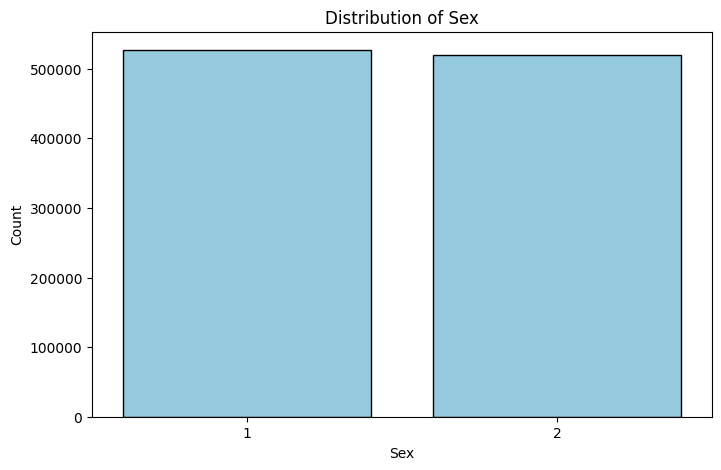

In [134]:
# Distribution of sex:
sex_counts = data['sex_atr'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=sex_counts.index, y=sex_counts.values, color = 'skyblue', edgecolor = 'black')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

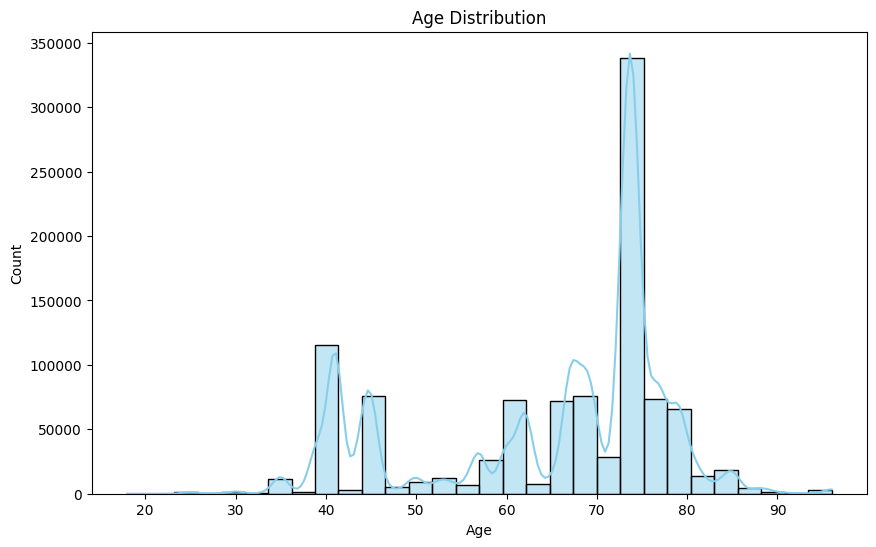

In [135]:
# Age distribution
# Plot
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True, color = 'skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

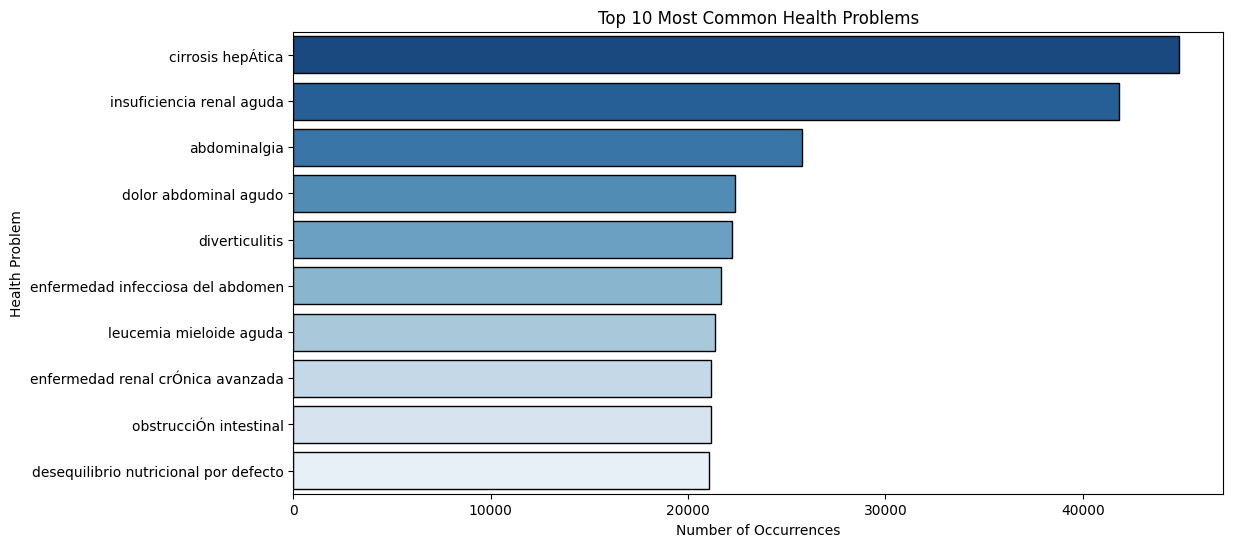

In [138]:
# Get the top 10 most common SNOMED descriptions
top_health_issues = data['snomed_descr'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_health_issues.values, y=top_health_issues.index, hue = top_health_issues.index, palette = 'Blues_r', edgecolor = 'black')

plt.title('Top 10 Most Common Health Problems')
plt.xlabel('Number of Occurrences')
plt.ylabel('Health Problem')
plt.show()

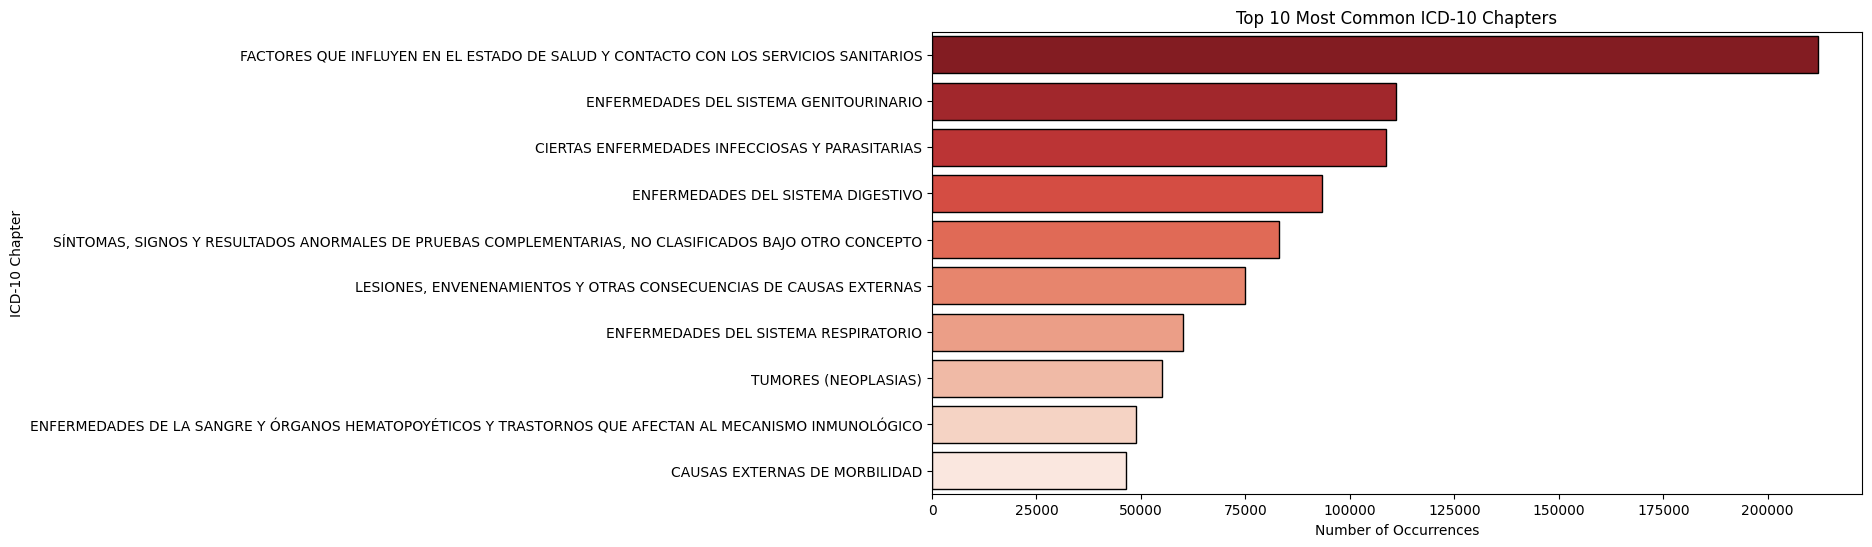

In [139]:
# Get the top 10 most common ICD-10 chapters
top_icd10 = data['icd10_capitulo'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_icd10.values, y=top_icd10.index,  hue = top_health_issues.index, palette = 'Reds_r', edgecolor = 'black', legend = False)
plt.title('Top 10 Most Common ICD-10 Chapters')
plt.xlabel('Number of Occurrences')
plt.ylabel('ICD-10 Chapter')
plt.show()

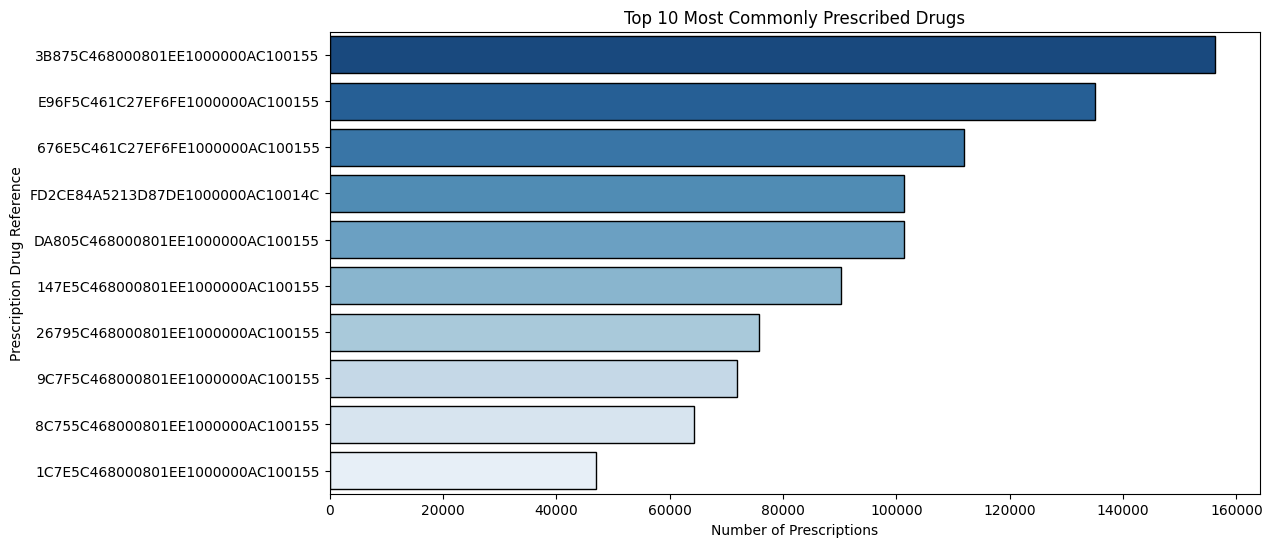

In [140]:
# Get the top 10 most commonly prescribed drugs
top_prescribed_drugs = data['prescription_drug_ref'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_prescribed_drugs.values, y=top_prescribed_drugs.index,hue = top_prescribed_drugs.index, palette = 'Blues_r', edgecolor = 'black')
plt.title('Top 10 Most Commonly Prescribed Drugs')
plt.xlabel('Number of Prescriptions')
plt.ylabel('Prescription Drug Reference')
plt.show()

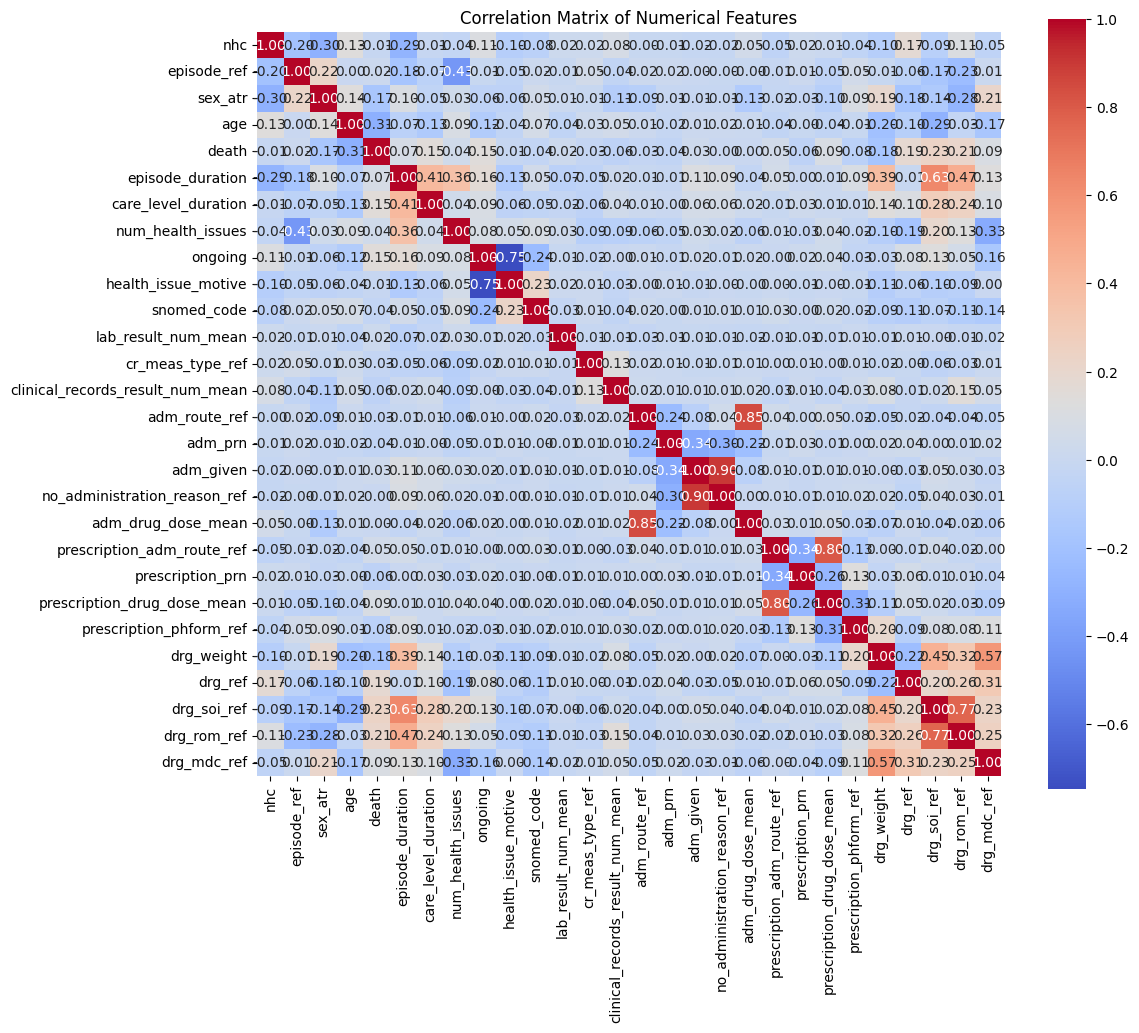

In [141]:
# Correlation Matriz
numerical_correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [142]:
# Find the most frequent SNOMED-to-ICD10 mappings
most_common_pairs = data.groupby(['snomed_code', 'icd10_capitulo']).size().reset_index(name='count')
most_common_pairs = most_common_pairs.sort_values(by='count', ascending=False).head(10)
display(most_common_pairs)

,snomed_code,icd10_capitulo,count
2063,723189000,ENFERMEDADES DEL SISTEMA GENITOURINARIO,7048
193,21522001,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,6344
2067,723189000,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,6224
2171,2147483647,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,6162
2059,723189000,CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITARIAS,6013
1836,416113008,FACTORES QUE INFLUYEN EN EL ESTADO DE SALUD Y ...,5654
2062,723189000,ENFERMEDADES DEL SISTEMA DIGESTIVO,5401
2068,723189000,"LESIONES, ENVENENAMIENTOS Y OTRAS CONSECUENCIA...",4543
1834,416113008,ENFERMEDADES DEL SISTEMA RESPIRATORIO,4235
197,21522001,TUMORES (NEOPLASIAS),4229


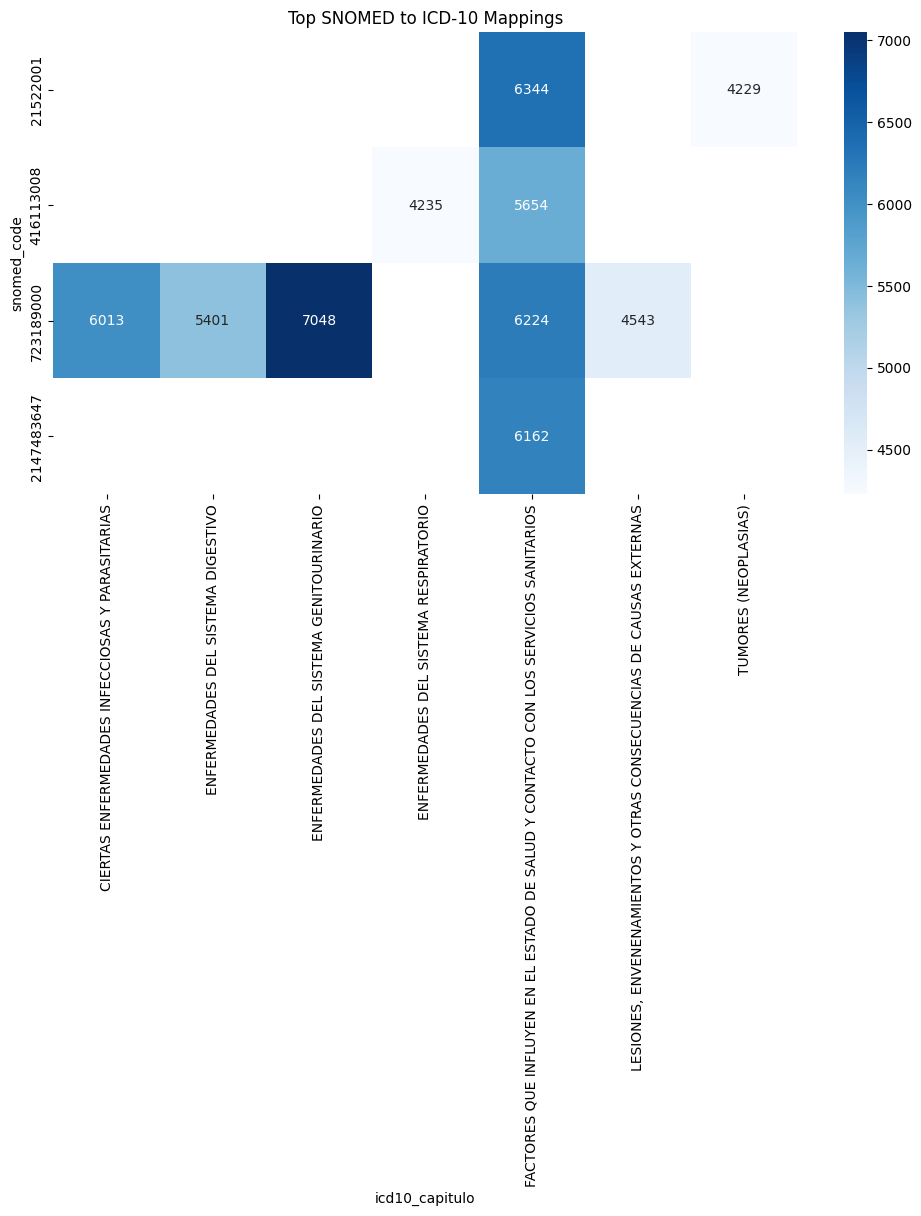

In [143]:
# Top SNOMED to ICD10 mapping
pivot = most_common_pairs.pivot(index='snomed_code', columns='icd10_capitulo', values='count')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='g', cmap='Blues')
plt.title('Top SNOMED to ICD-10 Mappings')
plt.show()